##Introduction:
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Understanding:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.


When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.



The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

. The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

. All other cases: All other cases when the payment is paid on time.



When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1.Approved: The Company has approved loan Application

2.Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

3.Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

4.Unused offer:  Loan has been cancelled by the client but at different stages of the process.

# Business Objective:

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

In [155]:
# Importing Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
import itertools
import seaborn as sns

In [156]:
# Ignoring the Warnings

import warnings
warnings.simplefilter('ignore')

In [157]:
# Adjusting Views

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [158]:
# reading the application data
data_application = pd.read_csv(r"/content/sample_data/application_data.csv")
data_application.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [159]:
data_application.shape
print('The Shape of application data is',data_application.shape)

The Shape of application data is (307511, 122)


In [160]:
data_previous = pd.read_csv(r"/content/sample_data/previous_application.csv")
data_previous.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
# application data column datatype
data_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [162]:
#previous data column datatype
data_previous.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239759 entries, 0 to 1239758
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1239759 non-null  int64  
 1   SK_ID_CURR                   1239759 non-null  int64  
 2   NAME_CONTRACT_TYPE           1239759 non-null  object 
 3   AMT_ANNUITY                  964492 non-null   float64
 4   AMT_APPLICATION              1239759 non-null  float64
 5   AMT_CREDIT                   1239758 non-null  float64
 6   AMT_DOWN_PAYMENT             578609 non-null   float64
 7   AMT_GOODS_PRICE              955066 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1239759 non-null  object 
 9   HOUR_APPR_PROCESS_START      1239759 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1239759 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1239759 non-null  int64  
 12  RATE_DOWN_PAYMENT            578609 non-nu

In [163]:
# Statistical analysis
data_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [164]:
data_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.239759e+06,1.239759e+06,964492.000000,1.239759e+06,1.239758e+06,5.786090e+05,9.550660e+05,1.239759e+06,1.239759e+06,578609.000000,4413.000000,4413.000000,1.239759e+06,1.239758e+06,964494.000000,742346.000000,742346.000000,742346.000000,742346.000000,742346.000000,742346.000000
mean,1.922651e+06,2.783655e+05,15891.498378,1.743483e+05,1.950656e+05,6.704178e+03,2.263459e+05,1.248764e+01,9.964291e-01,0.079667,0.187687,0.774052,-8.825236e+02,3.163662e+02,16.001019,342382.110550,13781.342398,33560.824110,76424.163506,81847.481949,0.331215
std,5.327584e+05,1.028595e+05,14741.714865,2.913161e+05,3.170674e+05,2.095503e+04,3.137054e+05,3.333072e+00,5.964987e-02,0.107874,0.085417,0.100397,7.796623e+02,7.388211e+03,14.511670,88605.024082,72340.603938,106570.569849,149535.937735,153209.135731,0.470650
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460820e+06,1.893180e+05,6300.000000,1.899000e+04,2.430000e+04,0.000000e+00,5.061600e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.305000e+03,-1.000000e+00,6.000000,365243.000000,-1629.000000,-1244.000000,-1316.000000,-1271.000000,0.000000
50%,1.923112e+06,2.786930e+05,11250.000000,7.087500e+04,8.023500e+04,1.642500e+03,1.113862e+05,1.200000e+01,1.000000e+00,0.051635,0.189122,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-362.000000,-538.000000,-499.000000,0.000000
75%,2.384046e+06,3.676340e+05,20525.400000,1.800000e+05,2.153790e+05,7.740000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-411.000000,127.000000,-75.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,1.000000,1.000000,-1.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [165]:
 # Checking null percentage in application data
 data_application.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

There are many columns in application dataframe where missing values are above 40%. Lets check column with more that 40% missing value.

In [166]:
null_application = pd.DataFrame((data_application.isnull().sum())*100/data_application.shape[0]).reset_index()
null_application.columns = ['Column Name', 'Null_value Percentage']

In [167]:
# more than or equal to 40% null rows columns
colnull_40_application = null_application[null_application["Null_value Percentage"]>=40]
colnull_40_application

,Column Name,Null_value Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [168]:
len(colnull_40_application)

49

There are total of 49 columns  which have more than 40% null values. Most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant.


In [169]:
# checking null percentage of previous data
data_previous.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.203267
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000081
AMT_DOWN_PAYMENT               53.328913
AMT_GOODS_PRICE                22.963576
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.328913
RATE_INTEREST_PRIMARY          99.644044
RATE_INTEREST_PRIVILEGED       99.644044
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.104705
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000081
NAME_PORTFOLIO                  0.000081
NAME_PRODUCT_TYP

In [170]:
previous_null = pd.DataFrame((data_previous.isnull().sum())*100/data_previous.shape[0]).reset_index()
previous_null.columns = ['Column Name', 'Null  Percentage']

In [171]:
null_40_previous = previous_null[previous_null["Null  Percentage"]>=40]
null_40_previous

,Column Name,Null Percentage
6,AMT_DOWN_PAYMENT,53.328913
12,RATE_DOWN_PAYMENT,53.328913
13,RATE_INTEREST_PRIMARY,99.644044
14,RATE_INTEREST_PRIVILEGED,99.644044
20,NAME_TYPE_SUITE,49.104705
31,DAYS_FIRST_DRAWING,40.121749
32,DAYS_FIRST_DUE,40.121749
33,DAYS_LAST_DUE_1ST_VERSION,40.121749
34,DAYS_LAST_DUE,40.121749
35,DAYS_TERMINATION,40.121749


<Axes: >

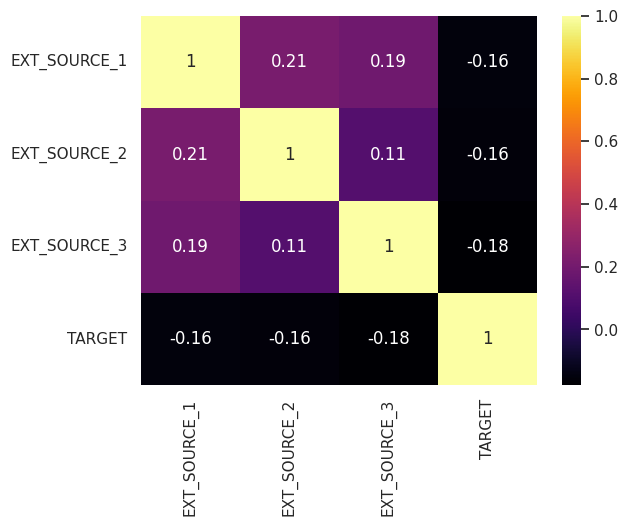

In [172]:
check_corr = data_application[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
corr = check_corr.corr()
sns.heatmap(corr,annot=True,cmap='inferno')

Since EXT_SOURCE_1,EXT_SOURCE_2	,EXT_SOURCE_3 have no correlation with target we will delete these col.


In [173]:

drop_application = colnull_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3']


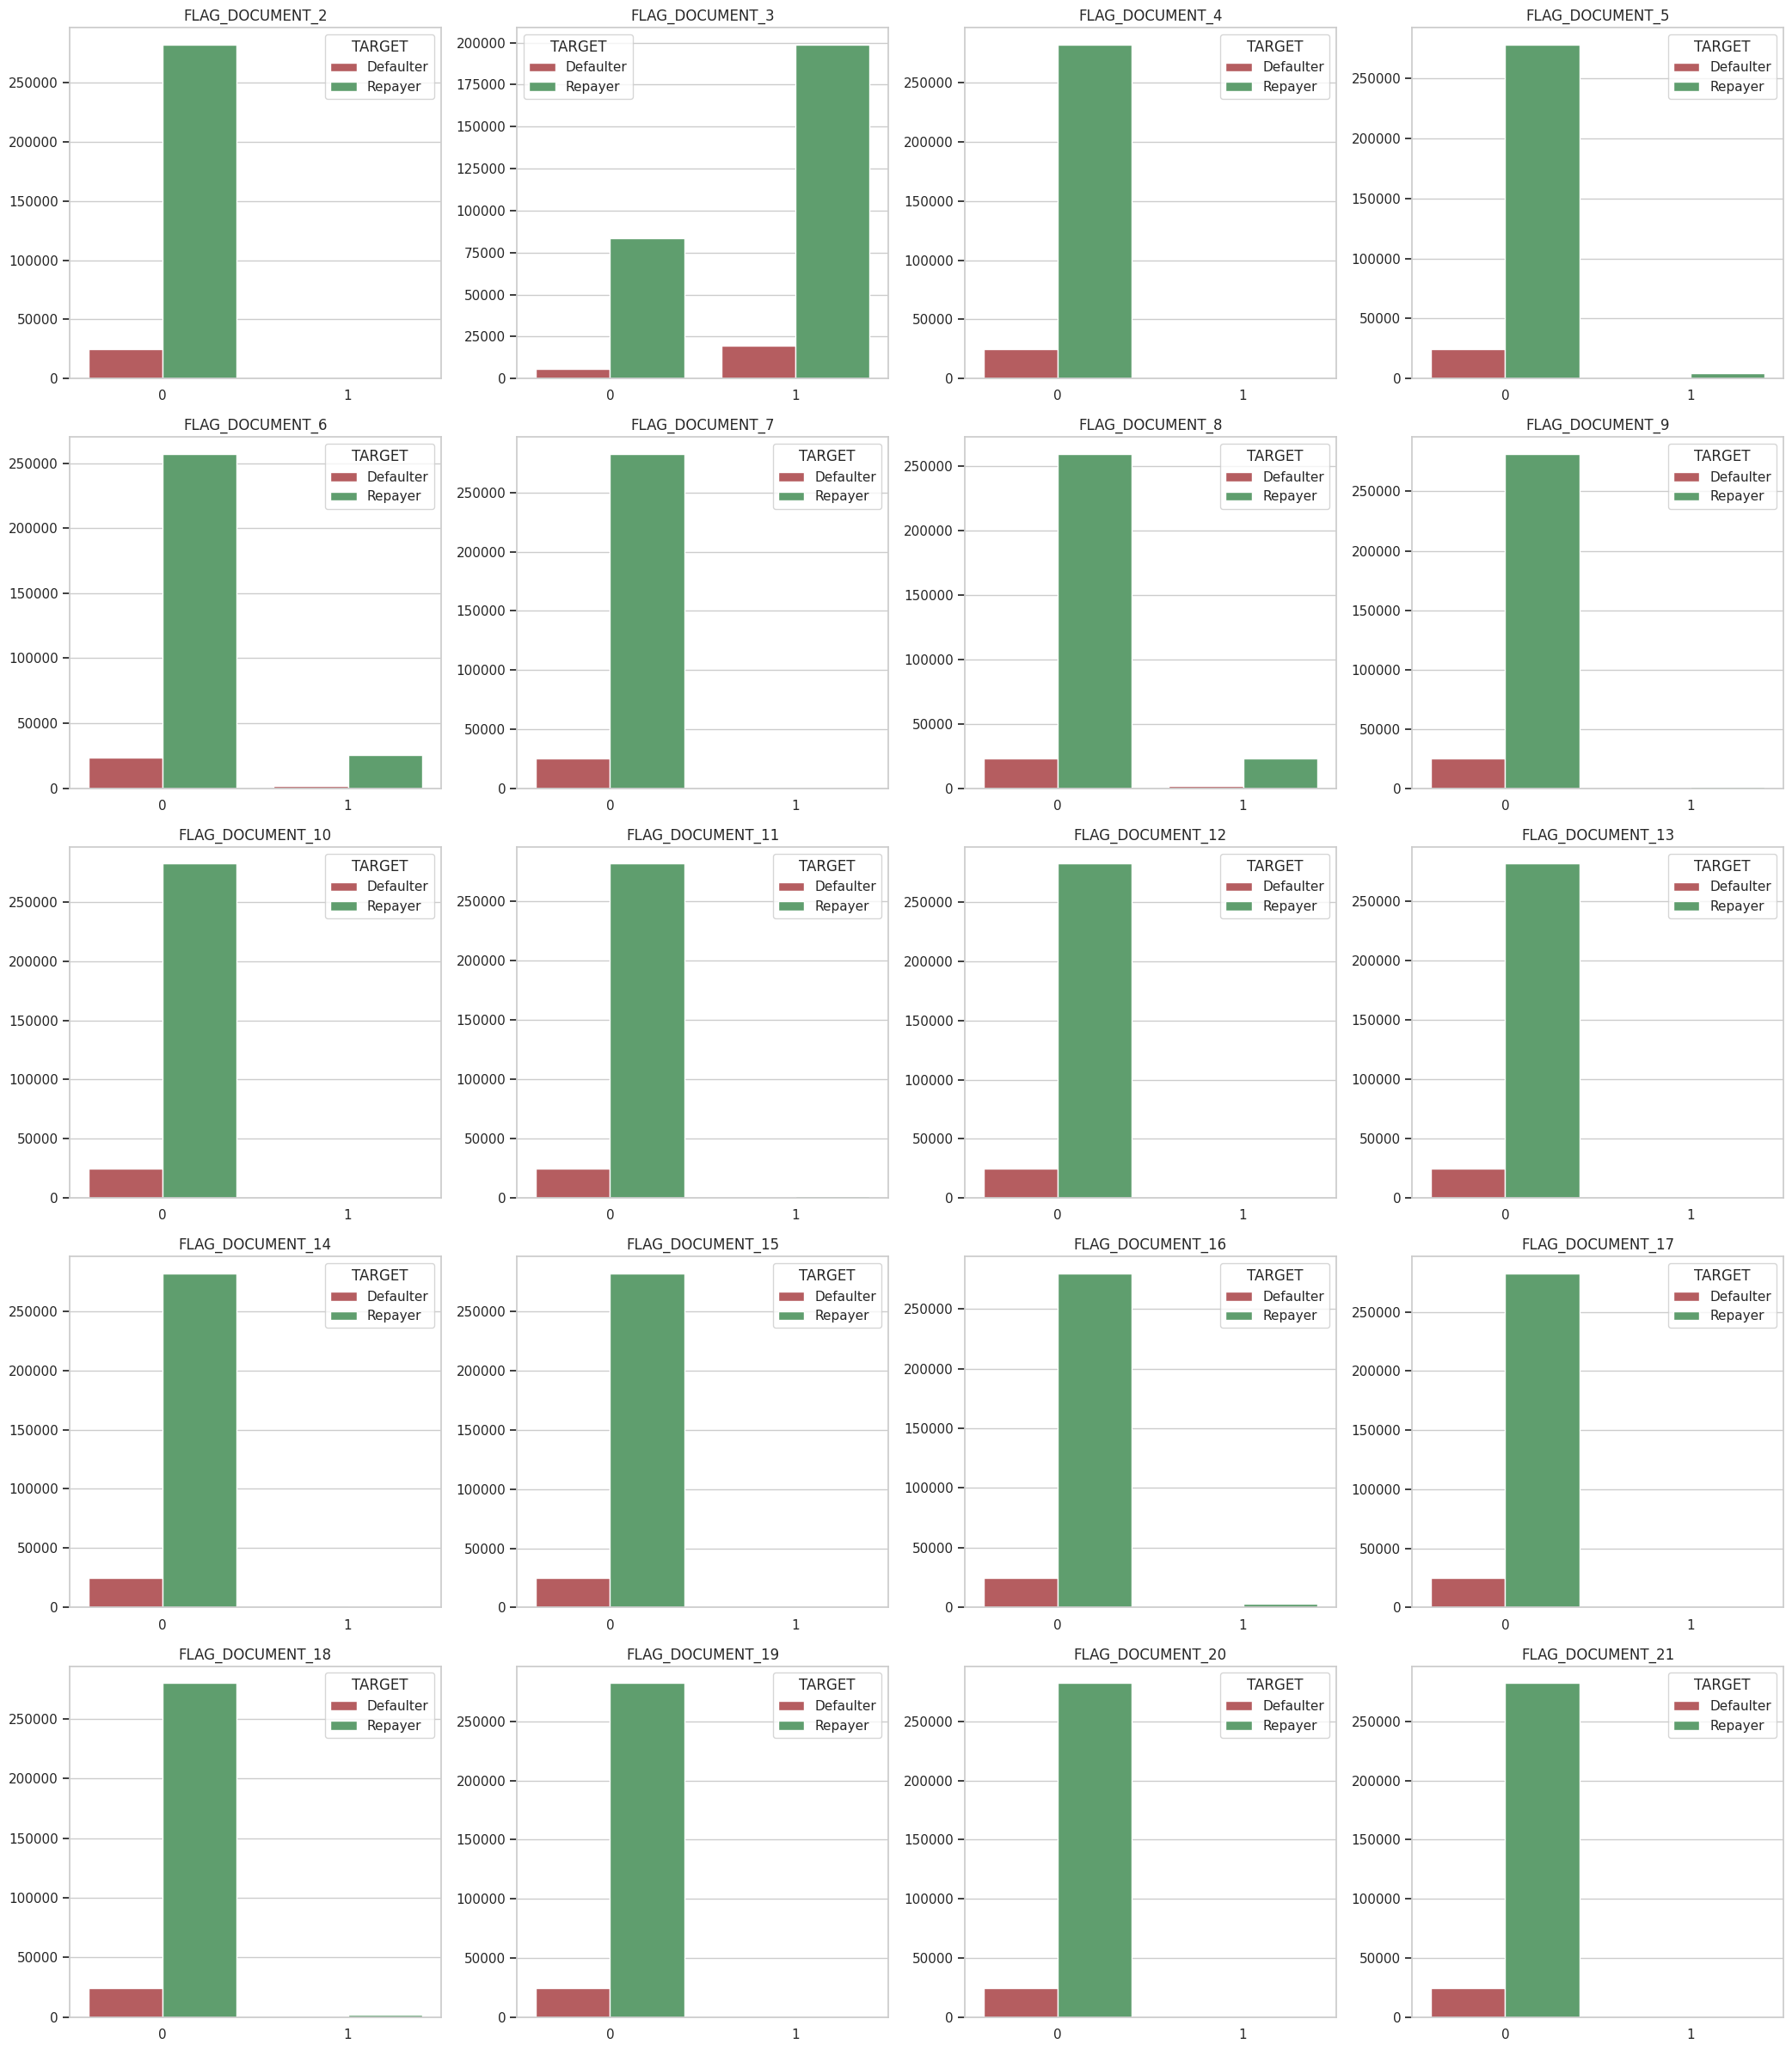

In [174]:

drop_appcols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = data_application[drop_appcols + ["TARGET"]]
df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

fig, axs = plt.subplots(5, 4, figsize=(21, 24))
axs = axs.ravel()

for i, column in enumerate(drop_appcols):
    ax = sns.countplot(x=column, hue="TARGET", data=df_flag, palette=["r", "g"], ax=axs[i])
    ax.yaxis.tick_left()
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(column)
    ax.legend(title="TARGET")

plt.tight_layout()
plt.show()


From the above graph we can understand that client who has applied for loan has not submitted the document except flag document 3 so except flag document 3 we will delete all the other flag documents.

In [175]:
# Including the flag 3 document
drop_appcols.remove('FLAG_DOCUMENT_3')


In [176]:
Unnecessary_col = drop_appcols+drop_application

In [177]:
len(Unnecessary_col)

70

<Axes: >

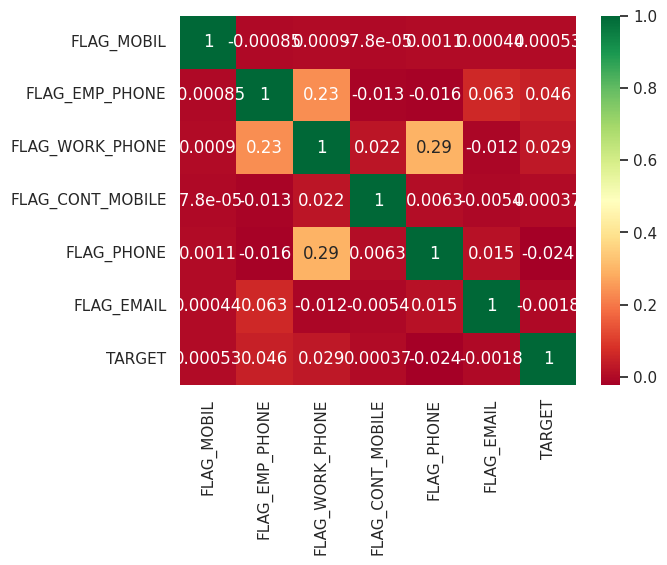

In [178]:
contact_col = data_application[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']]
contact_col.corr()
sns.heatmap(contact_col.corr(),annot = True,cmap='RdYlGn')

There is no correlation between contact columns and loan repayment so we can delete them.

In [179]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL']
Unnecessary_col = Unnecessary_col+contact_col

In [180]:
len(Unnecessary_col)

76

In [181]:
# Dropping the unnecessary columns from data_application
data_application.drop(labels=Unnecessary_col,axis=1,inplace=True)

In [182]:
data_application.shape

(307511, 46)

There are 45 columns after removing unnecessary columns

In [183]:
data_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [184]:
Unnecessary_prev = null_40_previous['Column Name'].to_list()
Unnecessary_prev

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [185]:
Unwanted_prev = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [186]:
Unwanted_prev_col = Unnecessary_prev+Unwanted_prev

In [187]:
len(Unwanted_prev_col)

15

Total 15 columns needs to be deleted from app_previous data

In [188]:
data_previous.drop(labels = Unwanted_prev_col,axis=1,inplace=True)


In [189]:
data_previous.shape

(1239759, 22)

There are 22 columns left after deleting unnecessary columns

In [190]:
data_application.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

In [191]:
data_application['AMT_ANNUITY'].isnull().sum()

12

In [192]:
data_application['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [193]:
data_application['AMT_ANNUITY'].mean()

27108.573909183444

In [194]:
# Imputing null value with mean for numerical column
data_application['AMT_ANNUITY']=data_application['AMT_ANNUITY'].fillna(data_application['AMT_ANNUITY'].mean())

In [195]:
data_application['AMT_ANNUITY'].isnull().sum()

0

In [196]:
data_application['OCCUPATION_TYPE'].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [197]:
#Imputing null value with mode for categorical column
data_application['OCCUPATION_TYPE'] = data_application['OCCUPATION_TYPE'].fillna((data_application['OCCUPATION_TYPE'].mode()[0]))

In [198]:
data_application['OCCUPATION_TYPE'].isnull().sum()

0

In [199]:
#Imputing null value with mode for categorical column
data_application['CNT_FAM_MEMBERS'] = data_application['CNT_FAM_MEMBERS'].fillna((data_application['CNT_FAM_MEMBERS'].mode()[0]))
data_application['CNT_FAM_MEMBERS'].isnull().sum()

0

In [200]:
data_application['NAME_TYPE_SUITE'] = data_application['NAME_TYPE_SUITE'].fillna((data_application['NAME_TYPE_SUITE'].mode()[0]))
data_application['NAME_TYPE_SUITE'].isnull().sum()

0

In [201]:
amt_req_col = []
for col in data_application:
    if col.startswith('AMT_REQ_CREDIT_BUREAU'):
        amt_req_col.append(col)
amt_req_col


['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [202]:
# Imputing null value with median for num column
for col in amt_req_col:
    data_application[col] = data_application[col].fillna((data_application[col].median()))


In [203]:
data_application[col].isnull().sum()

0

In [204]:
#Imputing null value with median for num column
data_application['AMT_GOODS_PRICE'] = data_application['AMT_GOODS_PRICE'].fillna((data_application['AMT_GOODS_PRICE'].median()))

In [205]:
data_application['AMT_GOODS_PRICE'].isnull().sum()

0

In [206]:
day_col = []
for col in data_application:
    if col.startswith('DAYS'):
        day_col.append(col)
day_col


['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [207]:
# Converting negative value to positive in day columns
for col in day_col:
    data_application[col] = abs(data_application[col])

In [208]:
data_application.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000000
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000


we still have null values in OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,we can ignore as their missing percentage is very less

In [209]:
data_previous.isnull().mean()*100

SK_ID_PREV                 0.000000
SK_ID_CURR                 0.000000
NAME_CONTRACT_TYPE         0.000000
AMT_ANNUITY               22.203267
AMT_APPLICATION            0.000000
AMT_CREDIT                 0.000081
AMT_GOODS_PRICE           22.963576
NAME_CASH_LOAN_PURPOSE     0.000000
NAME_CONTRACT_STATUS       0.000000
DAYS_DECISION              0.000000
NAME_PAYMENT_TYPE          0.000000
CODE_REJECT_REASON         0.000000
NAME_CLIENT_TYPE           0.000000
NAME_GOODS_CATEGORY        0.000081
NAME_PORTFOLIO             0.000081
NAME_PRODUCT_TYPE          0.000081
CHANNEL_TYPE               0.000081
SELLERPLACE_AREA           0.000081
NAME_SELLER_INDUSTRY       0.000081
CNT_PAYMENT               22.203106
NAME_YIELD_GROUP           0.000081
PRODUCT_COMBINATION        0.021214
dtype: float64

In [210]:
data_previous['AMT_ANNUITY'] = data_previous['AMT_ANNUITY'].fillna((data_previous['AMT_ANNUITY'].median()))

In [211]:
data_previous['AMT_GOODS_PRICE'] = data_previous['AMT_GOODS_PRICE'].fillna((data_previous['AMT_ANNUITY'].mode()[0]))

In [212]:
data_previous.loc[data_previous['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()


Canceled        225829
Refused          30309
Unused offer     19124
Approved             3
Name: NAME_CONTRACT_STATUS, dtype: int64

Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not approved

In [213]:
data_previous['CNT_PAYMENT'] = data_previous['CNT_PAYMENT'].fillna(0)

In [214]:
data_previous.isnull().mean()*100

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NAME_CONTRACT_TYPE        0.000000
AMT_ANNUITY               0.000000
AMT_APPLICATION           0.000000
AMT_CREDIT                0.000081
AMT_GOODS_PRICE           0.000000
NAME_CASH_LOAN_PURPOSE    0.000000
NAME_CONTRACT_STATUS      0.000000
DAYS_DECISION             0.000000
NAME_PAYMENT_TYPE         0.000000
CODE_REJECT_REASON        0.000000
NAME_CLIENT_TYPE          0.000000
NAME_GOODS_CATEGORY       0.000081
NAME_PORTFOLIO            0.000081
NAME_PRODUCT_TYPE         0.000081
CHANNEL_TYPE              0.000081
SELLERPLACE_AREA          0.000081
NAME_SELLER_INDUSTRY      0.000081
CNT_PAYMENT               0.000000
NAME_YIELD_GROUP          0.000081
PRODUCT_COMBINATION       0.021214
dtype: float64

In [216]:
#data_previous1 = data_previous.drop(['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'],axis=1)

In [217]:
data_previous1.isnull().mean()*100

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NAME_CONTRACT_TYPE        0.000000
AMT_ANNUITY               0.000000
AMT_APPLICATION           0.000000
AMT_CREDIT                0.000000
AMT_GOODS_PRICE           0.000000
NAME_CASH_LOAN_PURPOSE    0.005892
NAME_CONTRACT_STATUS      0.005892
DAYS_DECISION             0.005892
NAME_PAYMENT_TYPE         0.005892
CODE_REJECT_REASON        0.005892
NAME_CLIENT_TYPE          0.005892
NAME_GOODS_CATEGORY       0.005892
NAME_PORTFOLIO            0.005892
NAME_PRODUCT_TYPE         0.005892
CHANNEL_TYPE              0.005892
SELLERPLACE_AREA          0.005892
NAME_SELLER_INDUSTRY      0.005892
CNT_PAYMENT               0.000000
NAME_YIELD_GROUP          0.005892
PRODUCT_COMBINATION       0.017675
dtype: float64

In [218]:
 data_application.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Binning the data

In [219]:
data_application['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
data_application['AMT_INCOME_TOTAL'].max()

117000000.0

In [220]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

In [221]:
data_application['AMT_INCOME_TOTAL_RANGE'] = pd.cut(data_application['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [222]:
data_application.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100K        63698
100K-150K     91591
150K-200K     64307
200K-250K     48137
250K-300K     17039
300K-350K      8874
350K-400K      5802
Above 400K     8063
dtype: int64

In [223]:
data_application['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
data_application['AMT_CREDIT'].max()

4050000.0

In [224]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

data_application['AMT_CREDIT_RANGE'] = pd.cut(data_application['AMT_CREDIT'],bins,labels=ranges)

In [225]:
data_application.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-200K       36144
200K-400K    81151
400K-600K    66270
600K-800K    43242
800K-900K    21792
900K-1M       8927
1M-2M        47956
2M-3M         1997
Above 3M        32
dtype: int64

In [226]:
data_application['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
data_application['AMT_ANNUITY'].max()

258025.5

In [227]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

data_application['AMT_ANNUITY_RANGE'] = pd.cut(data_application['AMT_ANNUITY'],bins,labels=ranges)

In [228]:
data_application.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-25K         154867
25K-50K       131347
50K-100K       20792
100K-150K        437
150K-200K         32
Above 200K        36
dtype: int64

In [229]:
data_application['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']
data_application['AMT_GOODS_PRICE_RANGE'] = pd.cut(data_application['AMT_GOODS_PRICE'],bins,labels=ranges)

In [230]:
data_application.groupby(['AMT_GOODS_PRICE']).size()

AMT_GOODS_PRICE
40500.0          1
45000.0       1169
49500.0        157
50751.0          1
54000.0        290
58500.0        324
59782.5          1
60070.5          1
63000.0        116
67392.0          2
67500.0       1505
72000.0        217
76500.0        325
81000.0        379
84028.5          1
85500.0        144
90000.0       3169
94500.0        358
98028.0          1
99000.0        548
103500.0       933
108000.0       218
112500.0      2170
113724.0         1
117000.0       358
121500.0       428
121878.0         1
121945.5         1
126000.0       558
130500.0       202
135000.0      8206
137142.0         1
139500.0       446
140287.5         1
141354.0         1
143977.5         1
144000.0       742
146578.5         1
148500.0      1674
149719.5         1
153000.0       307
155965.5         1
157500.0      2704
159066.0         1
159093.0         1
161658.0         1
162000.0       487
162256.5         1
166500.0       434
171000.0       548
171468.0         1
175500.0       

In [231]:
data_application['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])
data_application['DAYS_EMPLOYED'].max()

365243

In [232]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]
ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']
data_application['DAYS_EMPLOYED_RANGE'] = pd.cut(data_application['DAYS_EMPLOYED'],bins,labels=ranges)

In [233]:
data_application.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
50Y-65Y           0
Above 65Y     55374
dtype: int64

In [234]:
data_application['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])
data_application['DAYS_BIRTH'].max()

25229

In [235]:
bins = [0,7300,10950,14600,18250,21900,25229]
ranges = ['20','30','40','50','60','70']
data_application['AGE'] = pd.cut(data_application['DAYS_BIRTH'],bins,labels=ranges)
data_application.groupby(['AGE']).size()

AGE
20        0
30    45021
40    82308
50    76541
60    68062
70    35579
dtype: int64

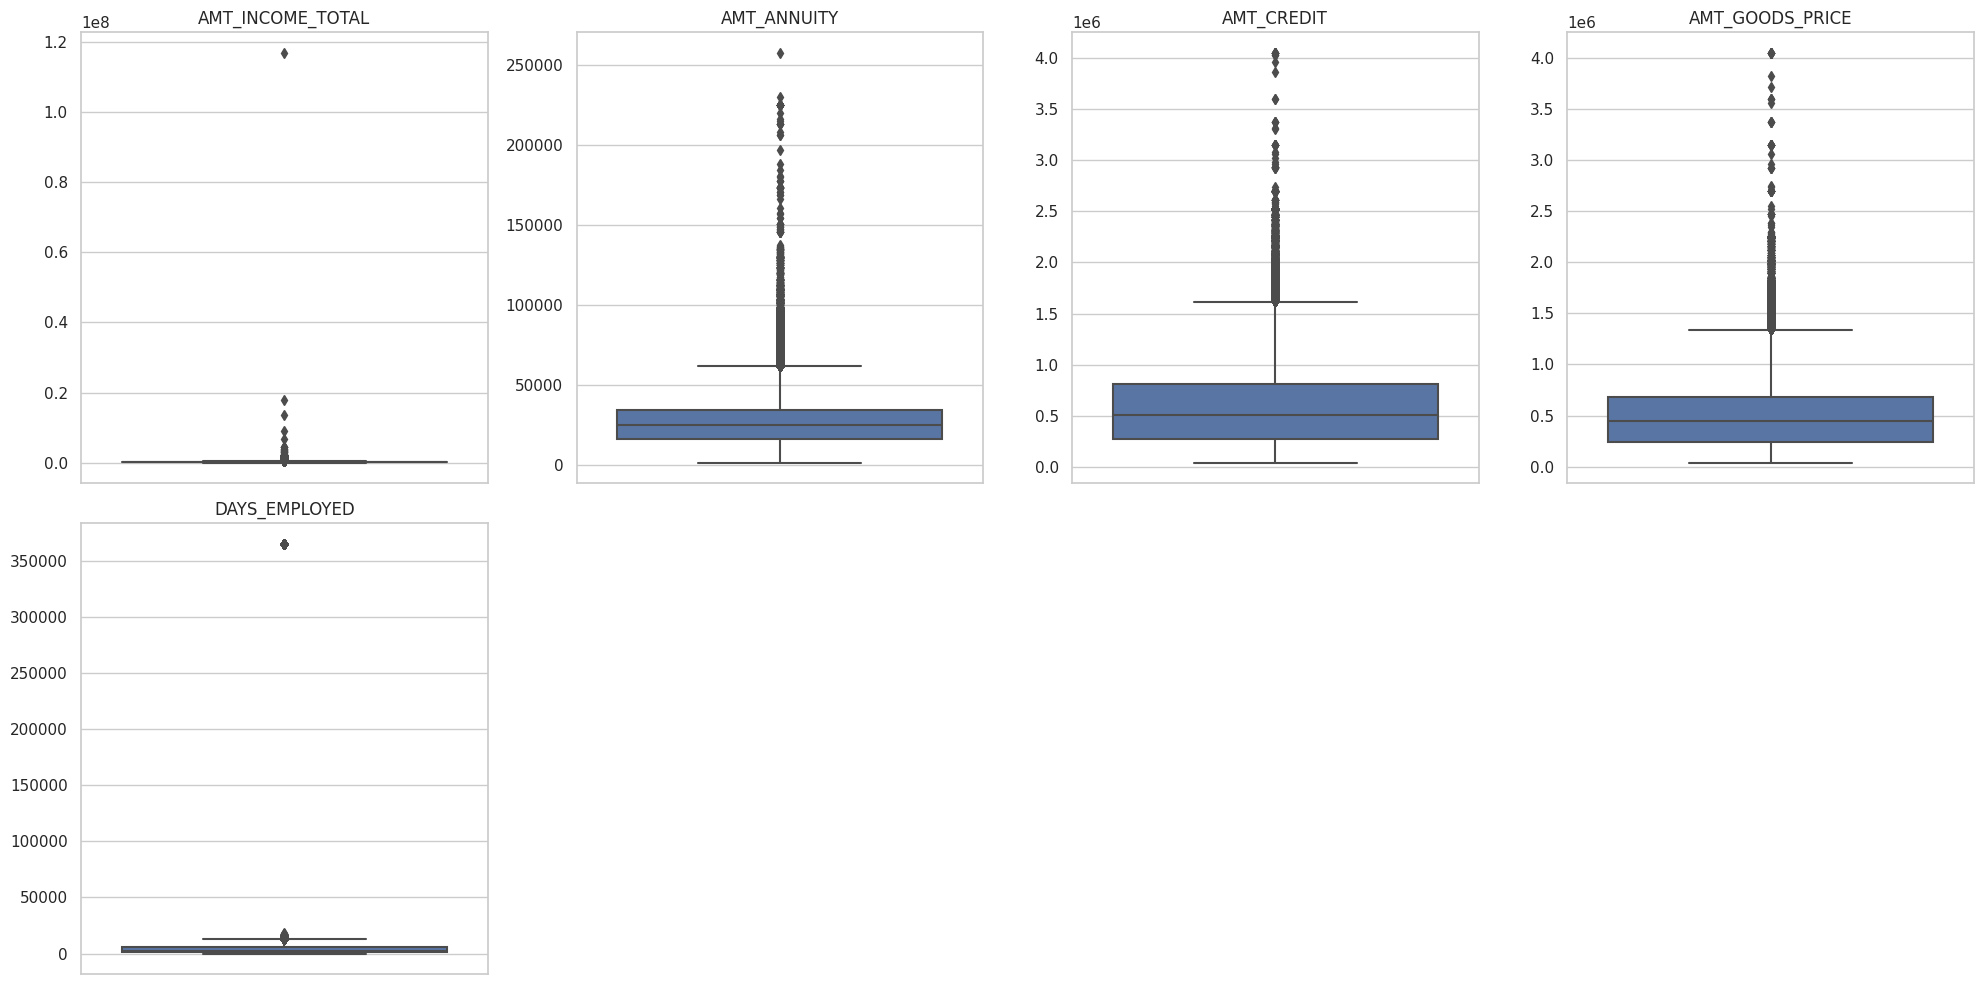

In [236]:
application_outlier = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
plt.figure(figsize=(20, 10))

for i, col in enumerate(application_outlier):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=data_application[col])
    plt.title(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()

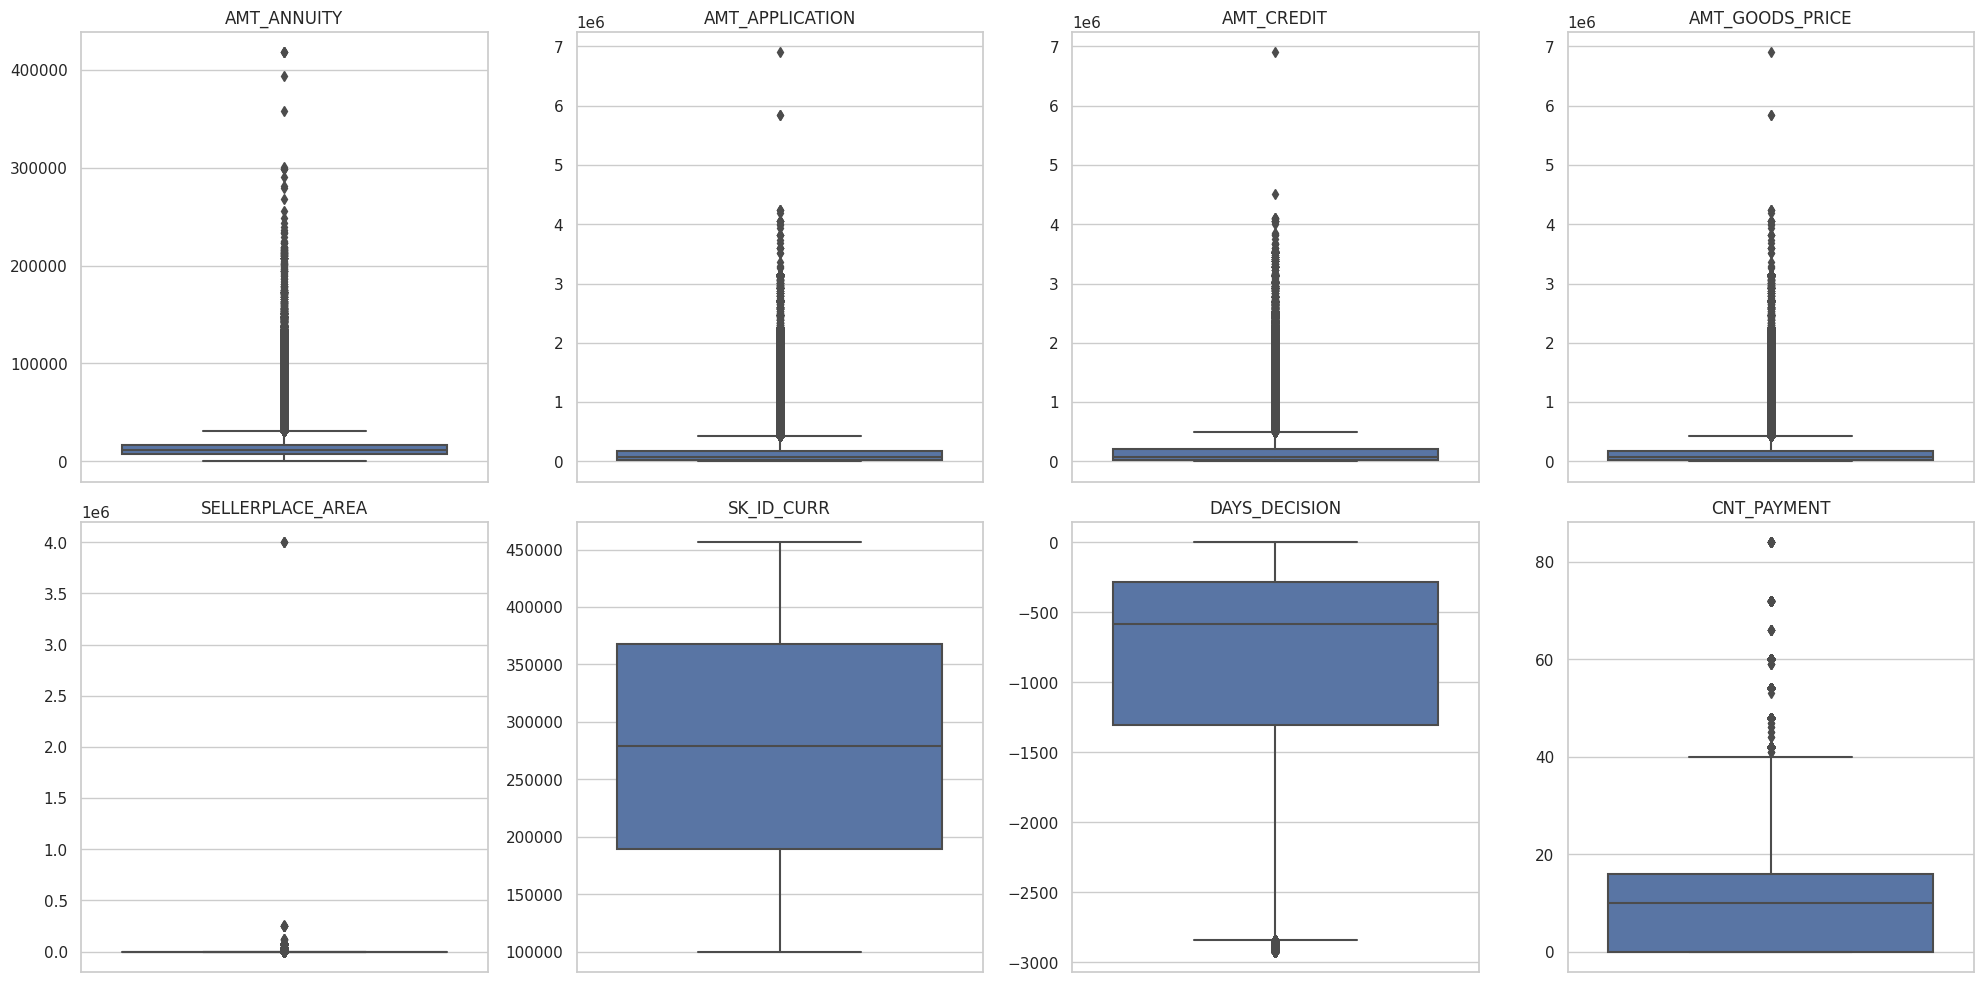

In [237]:

previous_outlier = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA', 'SK_ID_CURR', 'DAYS_DECISION', 'CNT_PAYMENT']

plt.figure(figsize=(20, 10))

for i, col in enumerate(previous_outlier):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=data_previous[col])
    plt.title(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()


It can be seen in previous application data that:
1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
2. SK_ID_CURR has no outliers.
3. CNT_PAYMENT and DAYS_DECISION has few outliers.

## Imbalance analysis

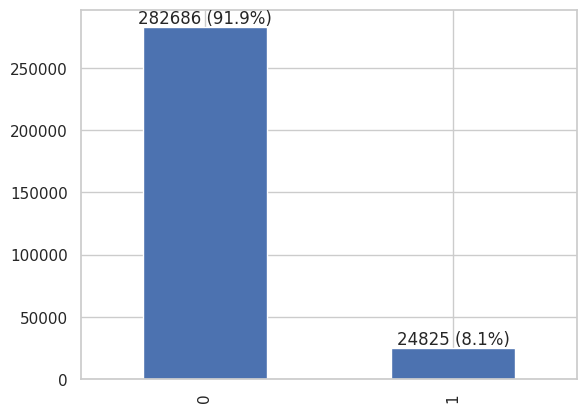

In [238]:

data_application['TARGET'].value_counts().plot.bar()

total = len(data_application['TARGET'])
for index, value in enumerate(data_application['TARGET'].value_counts()):
    percentage = (value / total) * 100
    plt.text(index, value, f'{value} ({percentage:.1f}%)', ha='center', va='bottom')


plt.show()


## Univariate Analysis

Categorical Variable analysis

In [239]:
data_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [240]:
data_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [241]:
Repayer = data_application[data_application['TARGET']==0]
Defaulter = data_application[data_application['TARGET']==1]

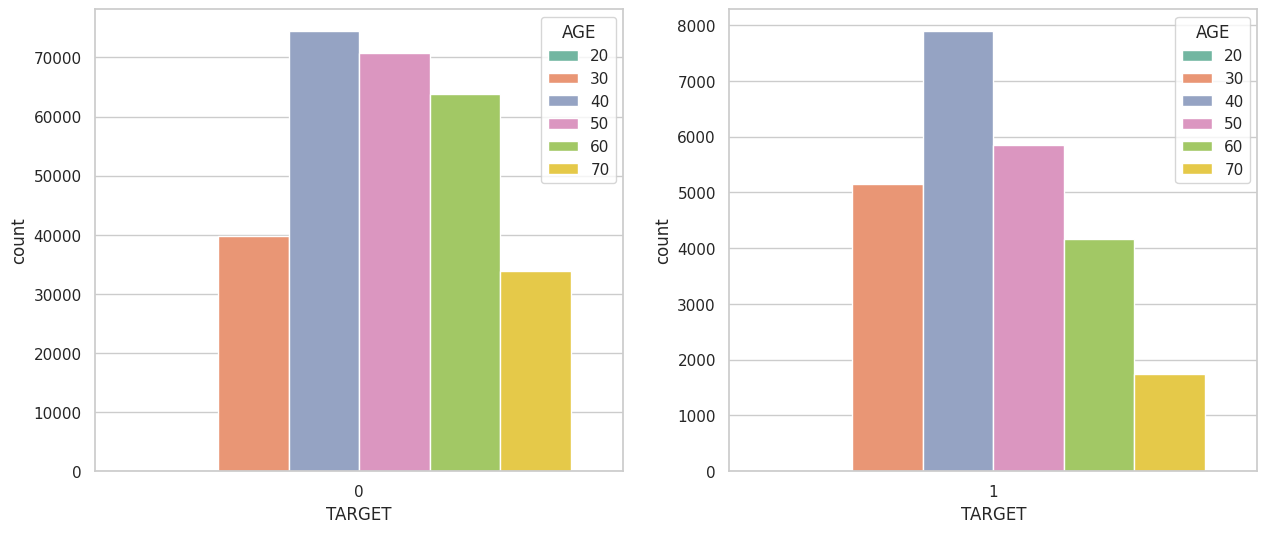

In [242]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(data=Repayer,x='TARGET',hue='AGE',palette = 'Set2')
plt.subplot(122)
sns.countplot(data=Defaulter,x='TARGET',hue='AGE',palette = 'Set2')
plt.show()

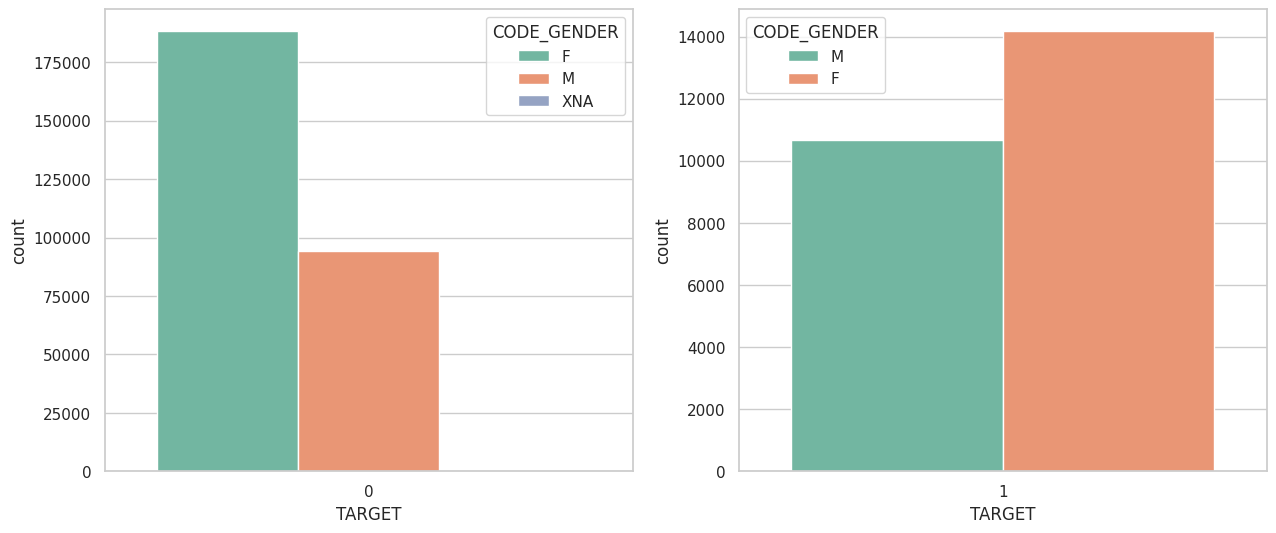

In [243]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Defaulter,palette = 'Set2')
plt.show()

In [244]:
category_col = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE','AMT_CREDIT_RANGE','AMT_INCOME_TOTAL_RANGE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

Seperating categorical columns from application data for analysis

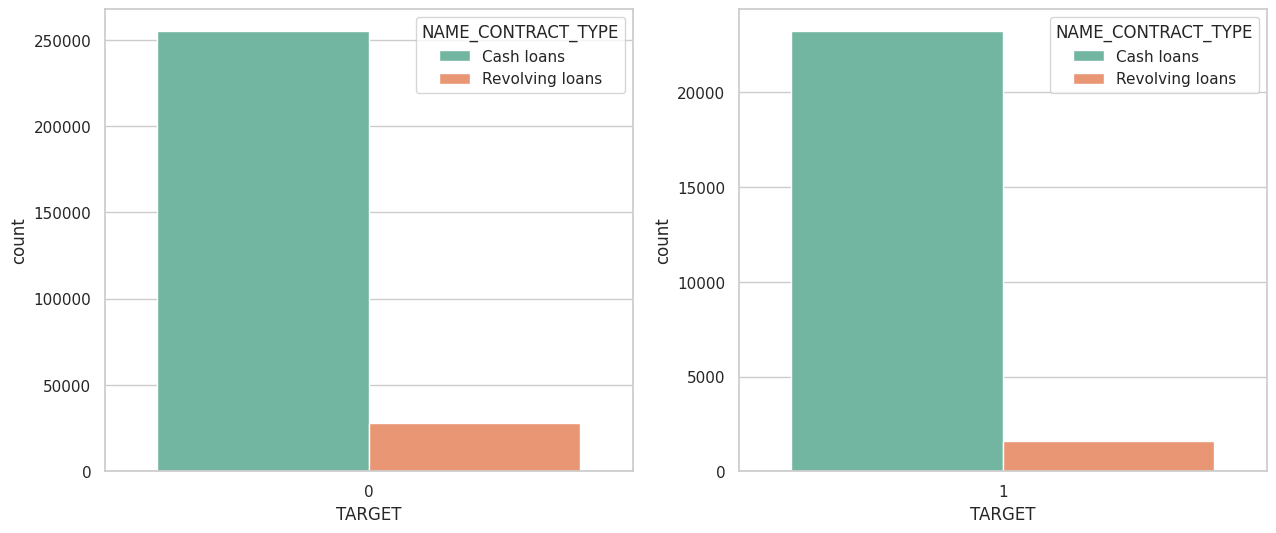

In [245]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=Defaulter,palette = 'Set2')
plt.show()

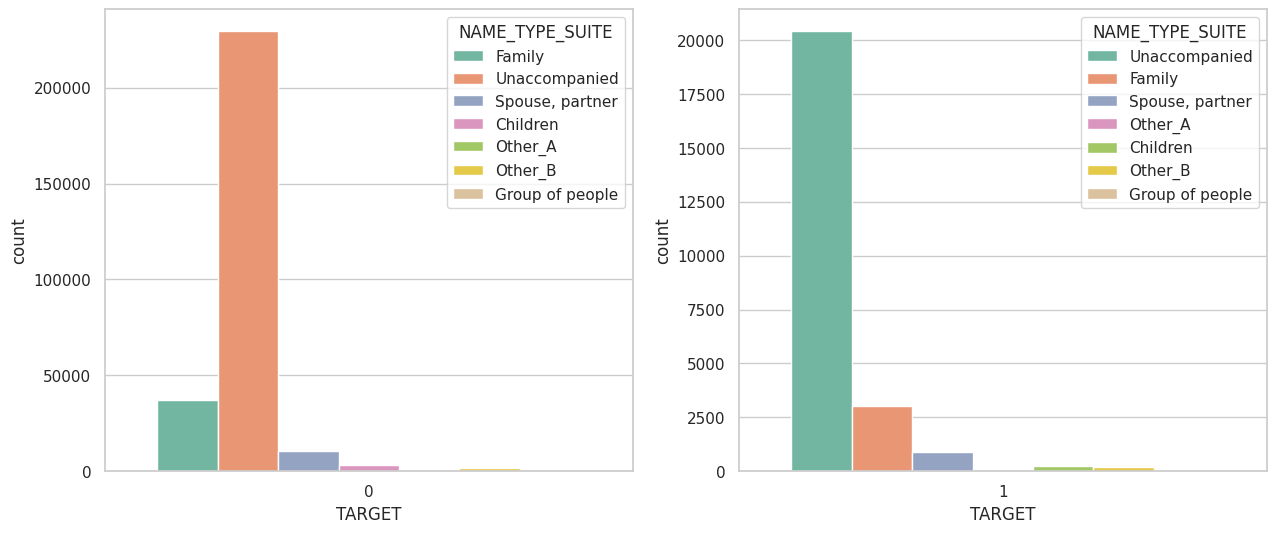

In [246]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_TYPE_SUITE',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_TYPE_SUITE',data=Defaulter,palette = 'Set2')
plt.show()

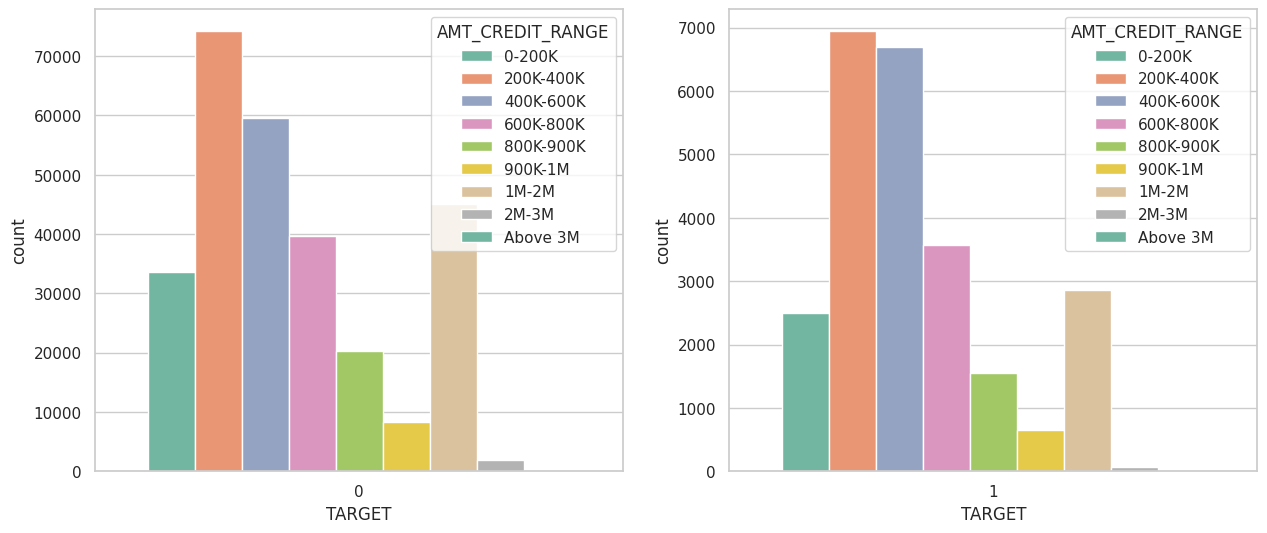

In [247]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AMT_CREDIT_RANGE',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AMT_CREDIT_RANGE',data=Defaulter,palette = 'Set2')
plt.show()

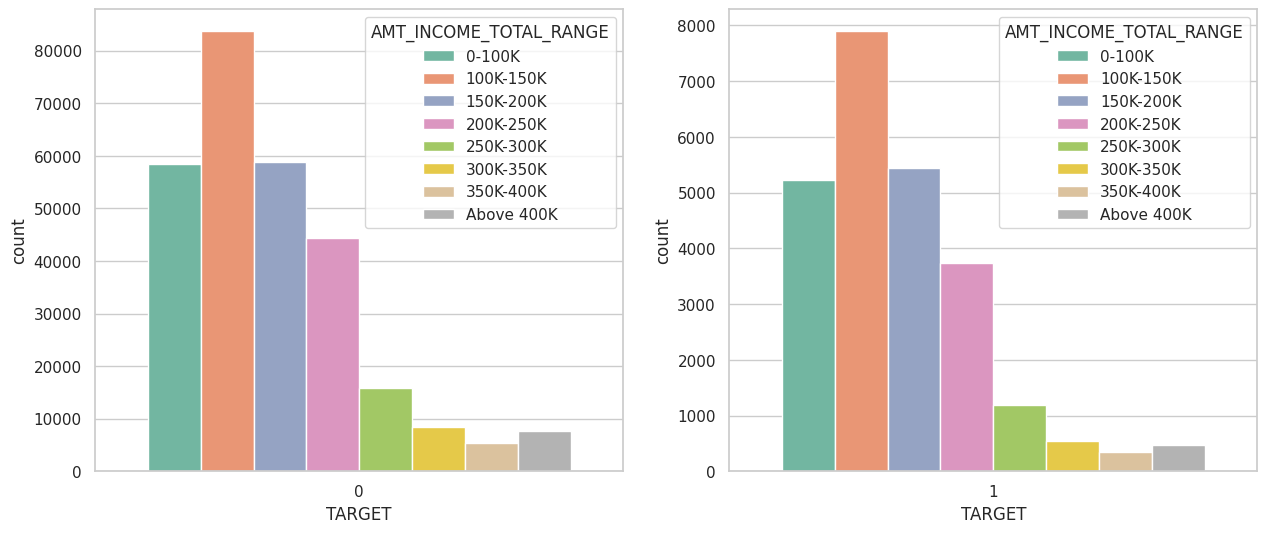

In [248]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AMT_INCOME_TOTAL_RANGE',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AMT_INCOME_TOTAL_RANGE',data=Defaulter,palette = 'Set2')
plt.show()

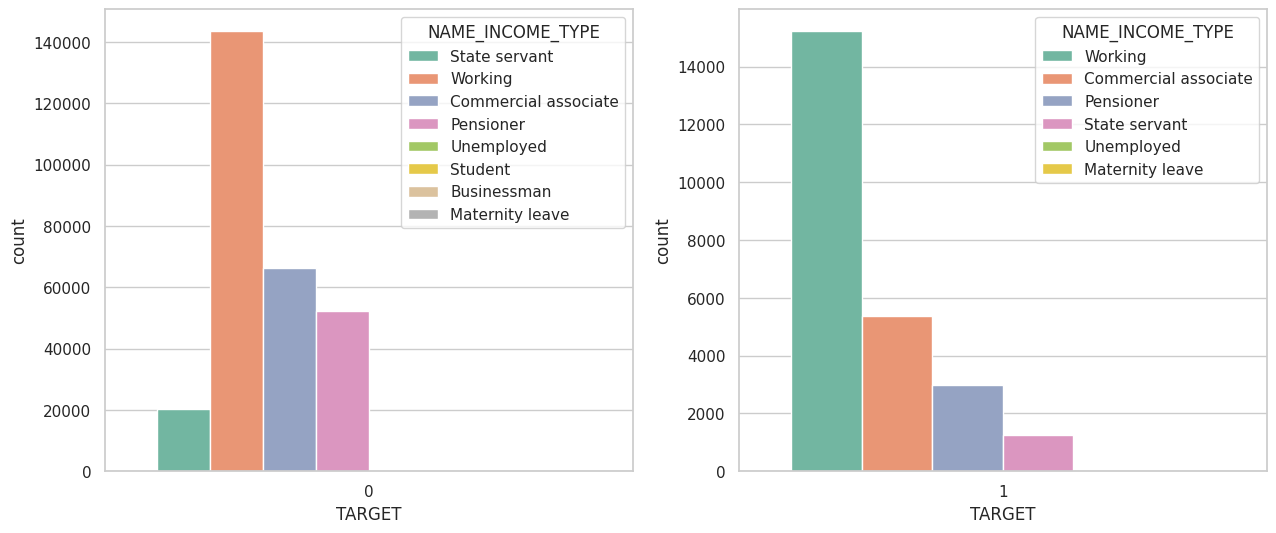

In [249]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=Defaulter,palette = 'Set2')
plt.show()

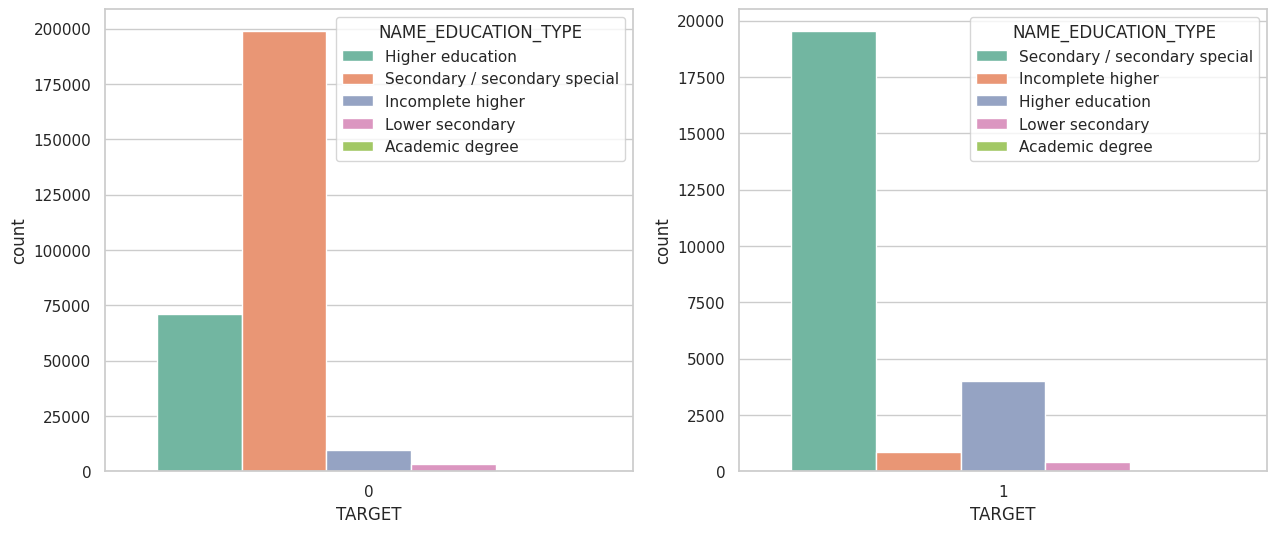

In [250]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_EDUCATION_TYPE',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_EDUCATION_TYPE',data=Defaulter,palette = 'Set2')
plt.show()

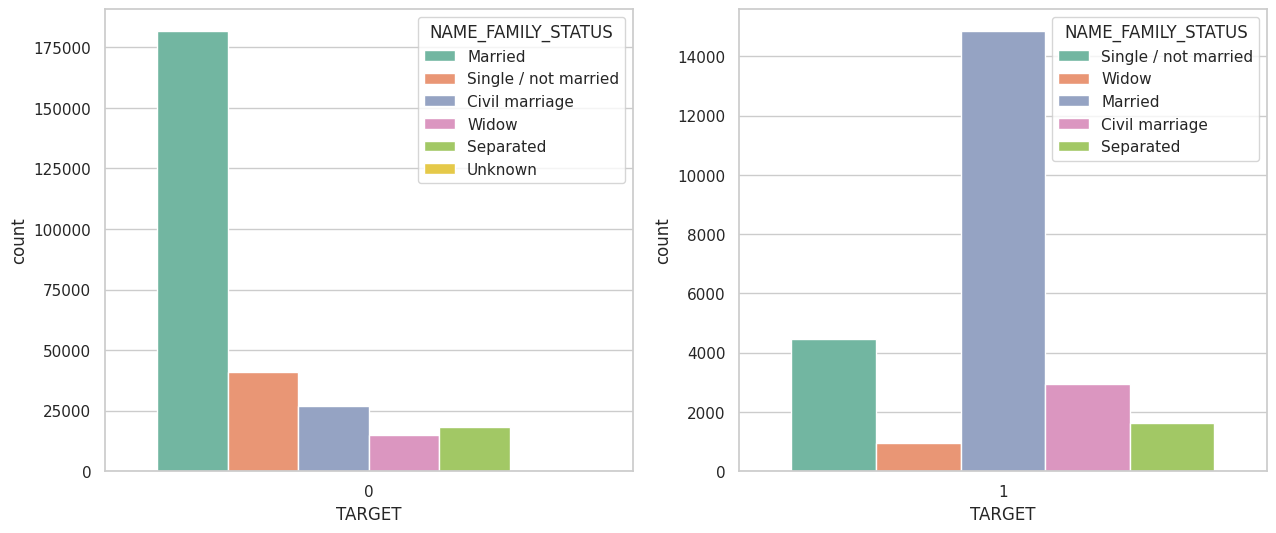

In [251]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=Defaulter,palette = 'Set2')
plt.show()

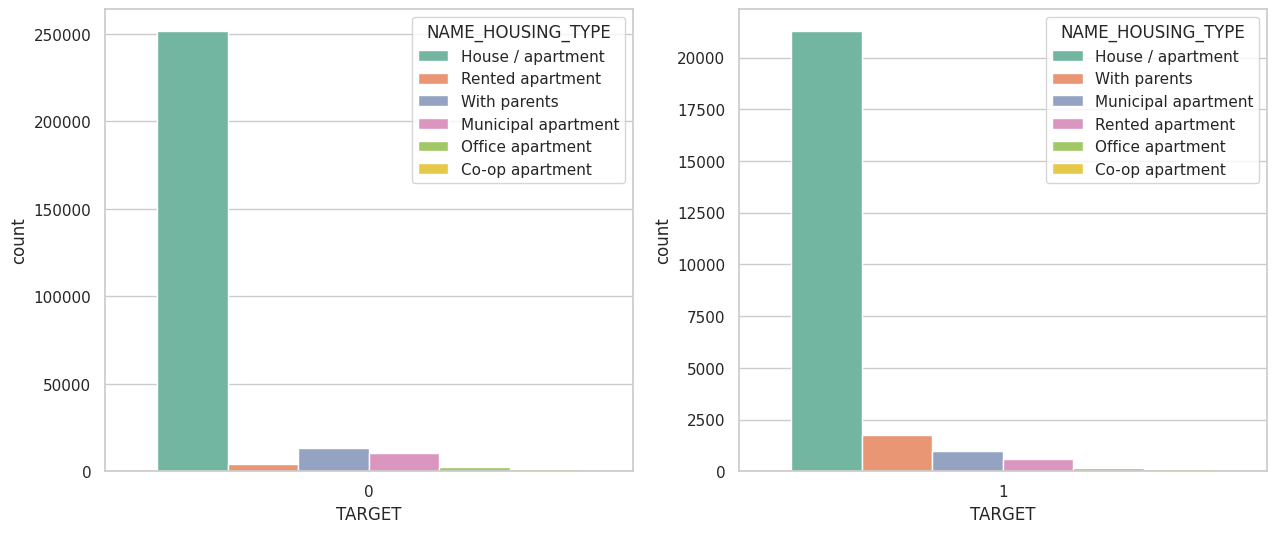

In [252]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_HOUSING_TYPE',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_HOUSING_TYPE',data=Defaulter,palette = 'Set2')
plt.show()

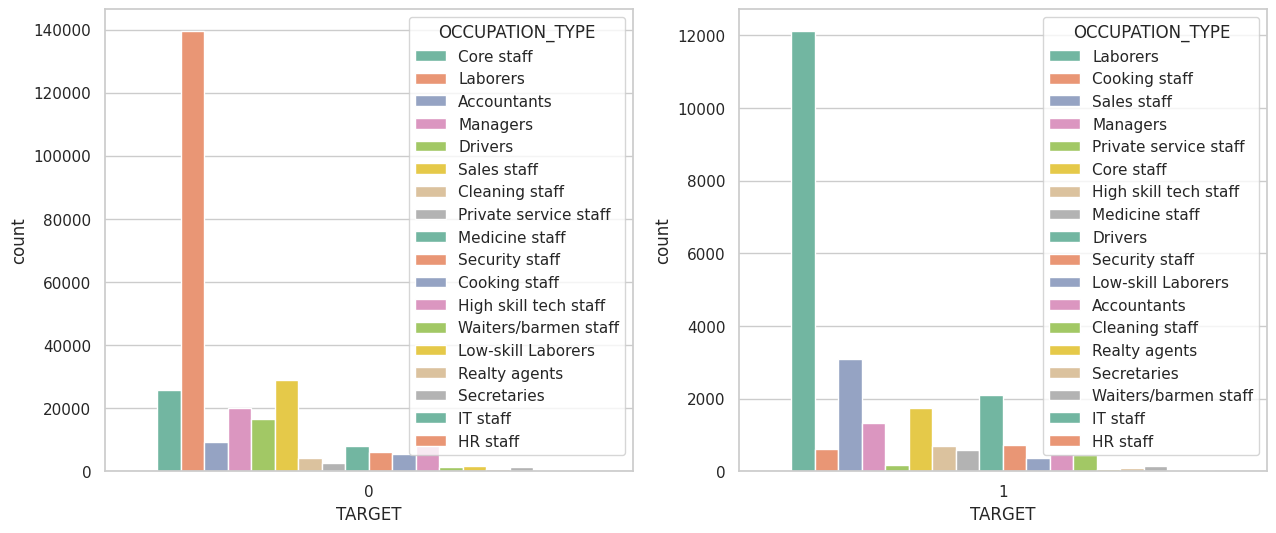

In [253]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='OCCUPATION_TYPE',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='OCCUPATION_TYPE',data=Defaulter,palette = 'Set2')
plt.show()

In [254]:
data_application['OCCUPATION_TYPE'].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

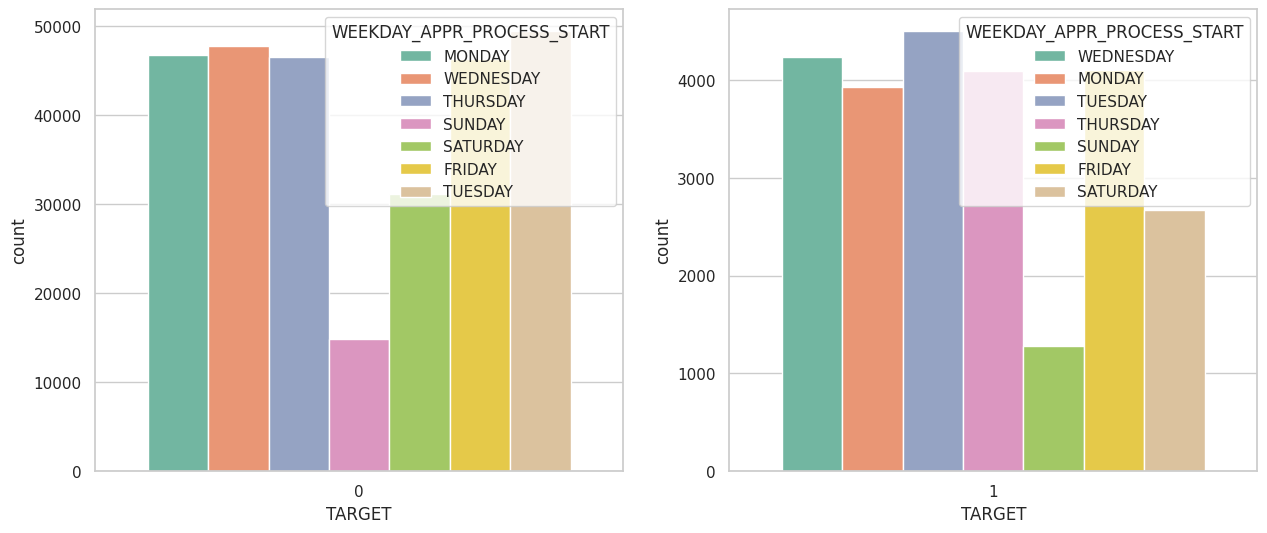

In [255]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='WEEKDAY_APPR_PROCESS_START',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='WEEKDAY_APPR_PROCESS_START',data=Defaulter,palette = 'Set2')
plt.show()

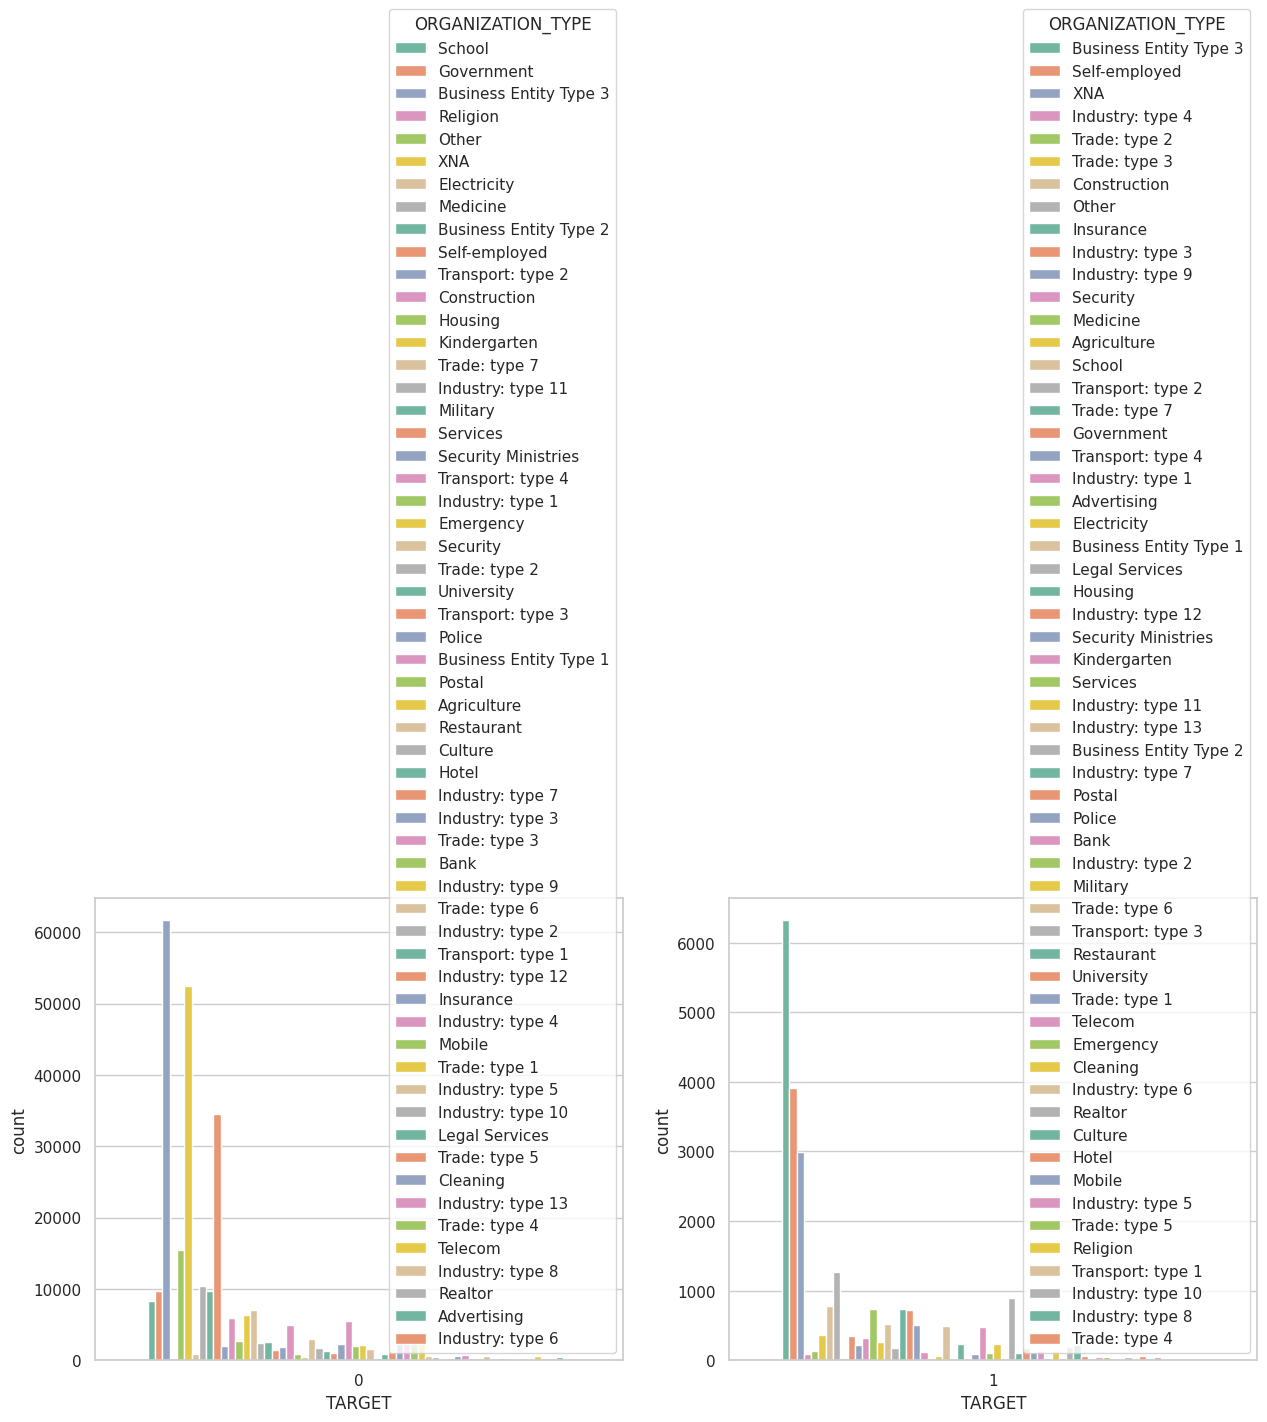

In [256]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='ORGANIZATION_TYPE',data=Repayer,palette = 'Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='ORGANIZATION_TYPE',data=Defaulter,palette = 'Set2')
plt.show()

Univariate analysis of numerical columns

In [257]:
def uni_num(col):
  sns.set(style='whitegrid')
  plt.figure(figsize=(20,10))

  plt.subplot(1,2,1)
  sns.distplot(Repayer[col],color='b')
  plt.xlabel(col,fontsize=30,fontweight='bold')
  plt.ylabel('No Paying Issue', fontsize=25, fontweight='bold')
  plt.xticks(rotation=90, fontsize=25)
  plt.yticks(rotation=360, fontsize=25)

  plt.subplot(1,2,2)
  sns.distplot(Defaulter[col],color='b')
  plt.xlabel(col,fontsize=30,fontweight='bold')
  plt.ylabel('Paying Issue', fontsize=25, fontweight='bold')
  plt.xticks(rotation=90, fontsize=25)
  plt.yticks(rotation=360, fontsize=25)
  plt.show()

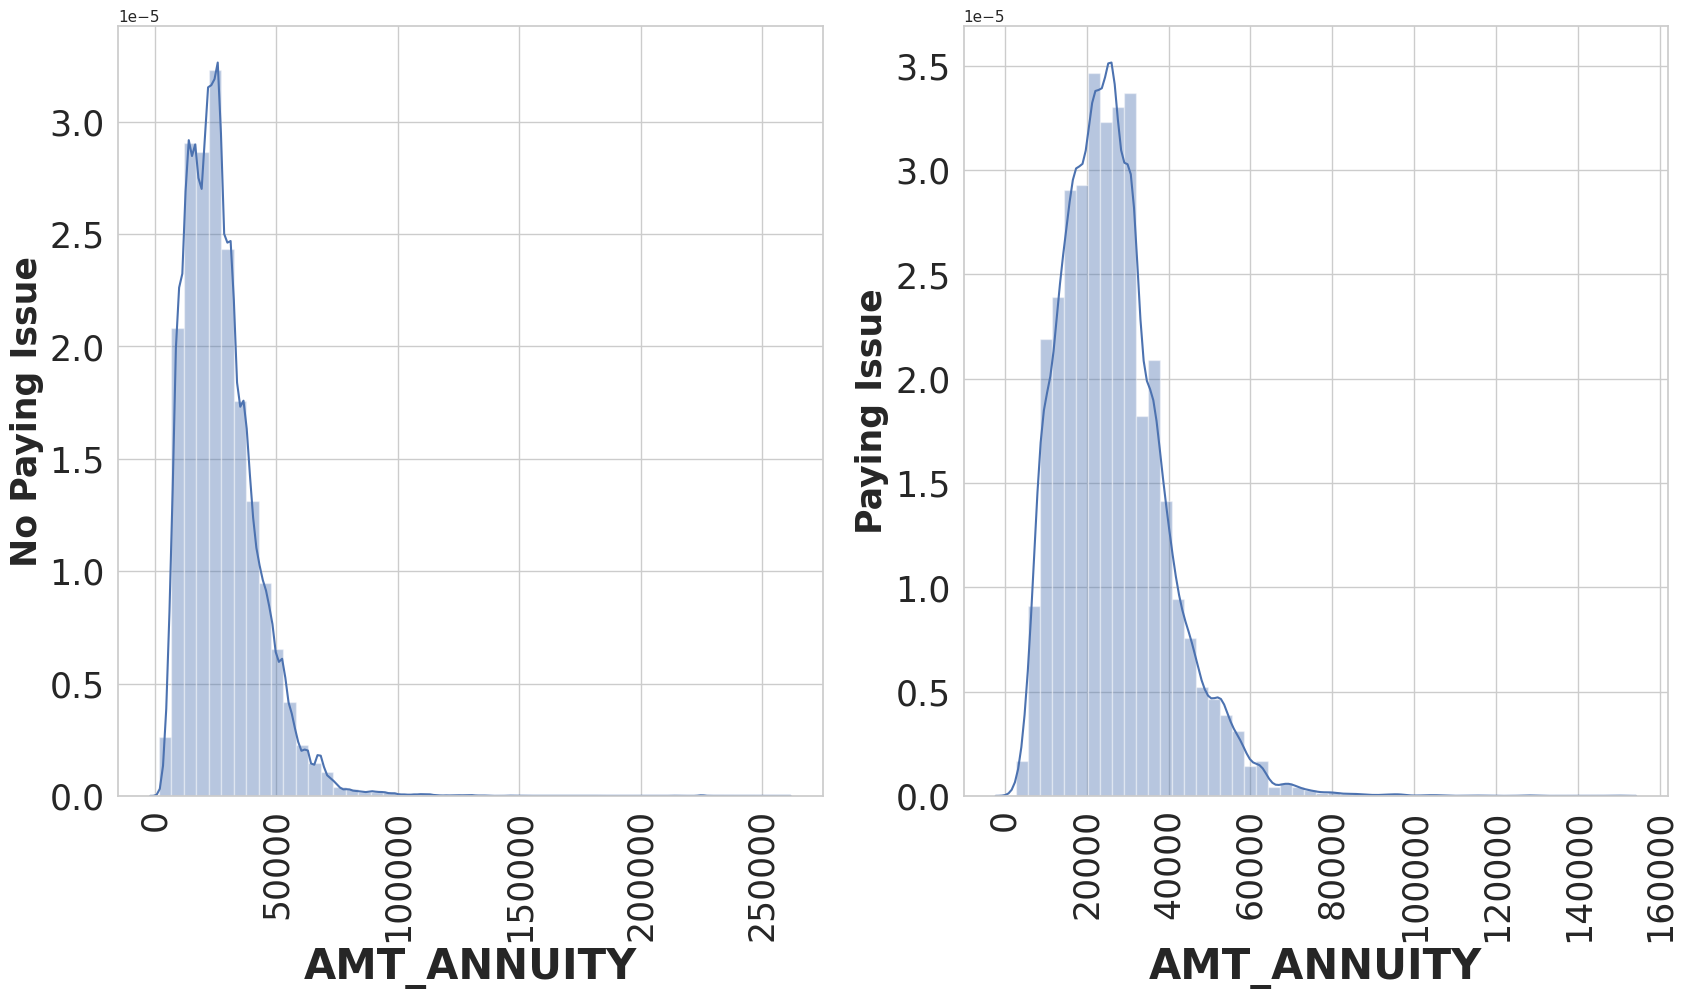

In [258]:
uni_num(col='AMT_ANNUITY')

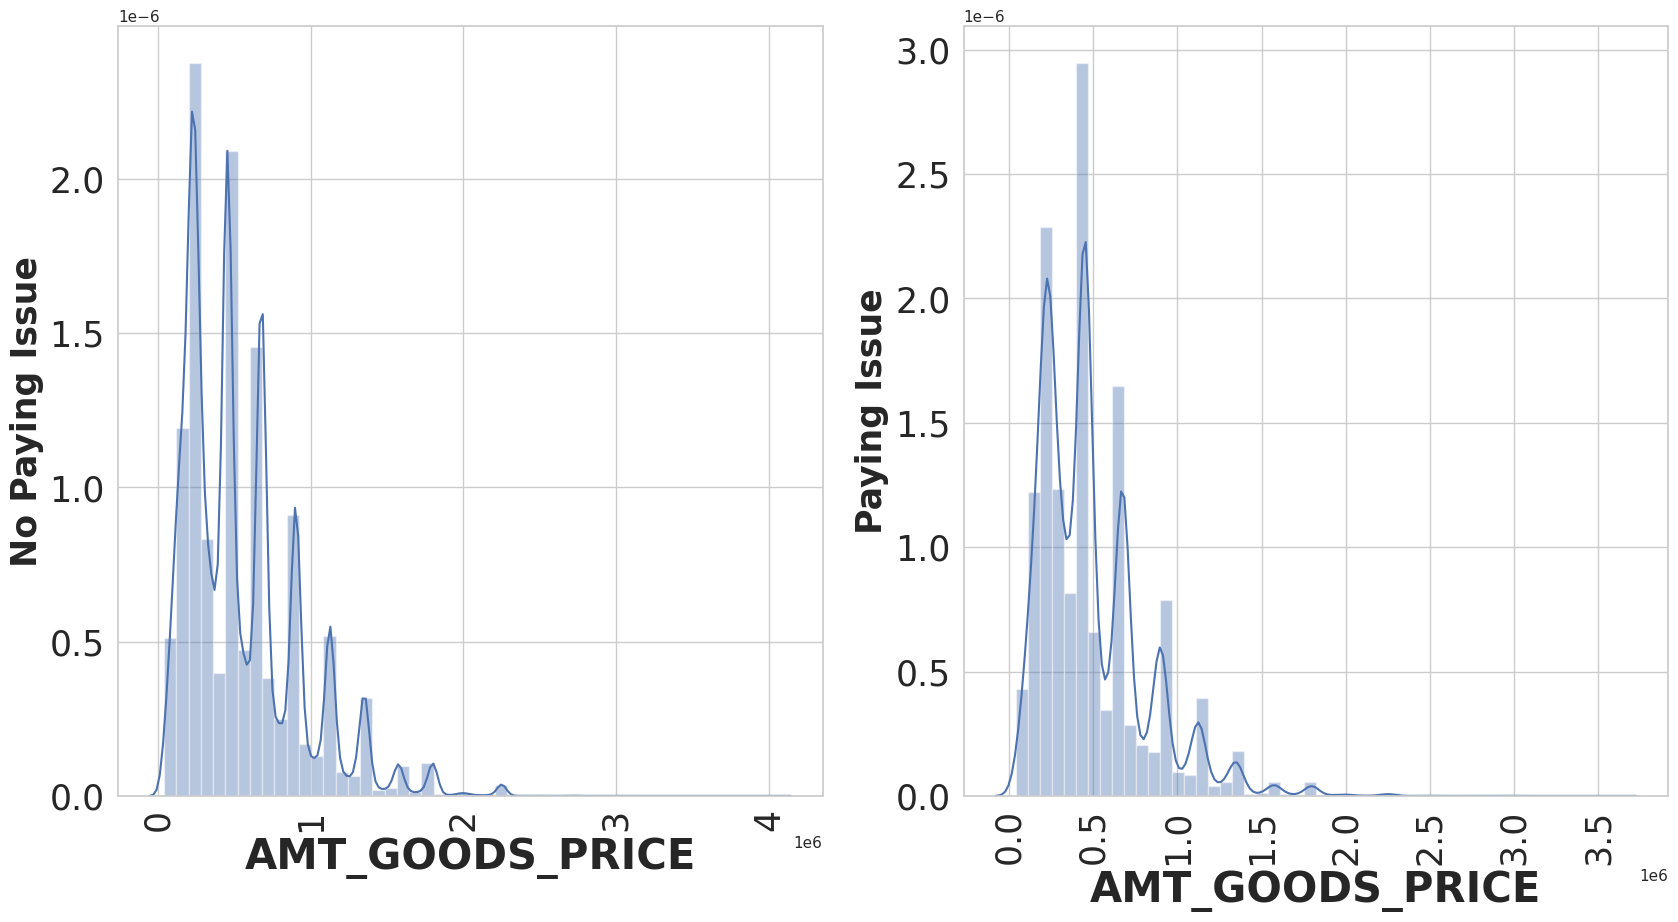

In [259]:
uni_num(col='AMT_GOODS_PRICE')

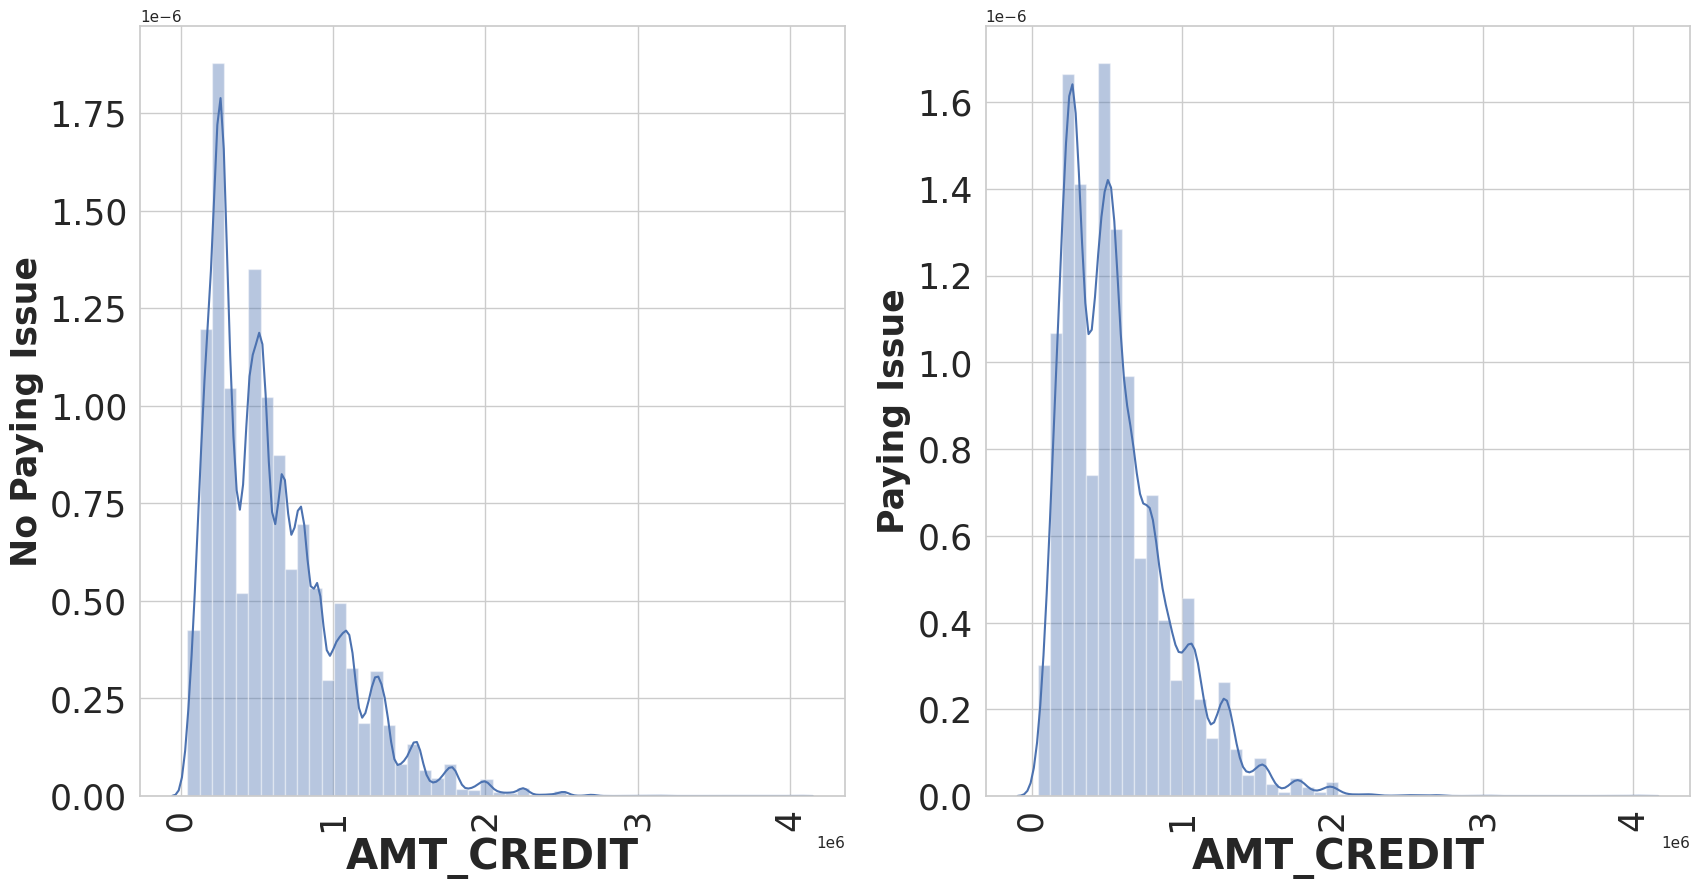

In [260]:
uni_num(col='AMT_CREDIT')

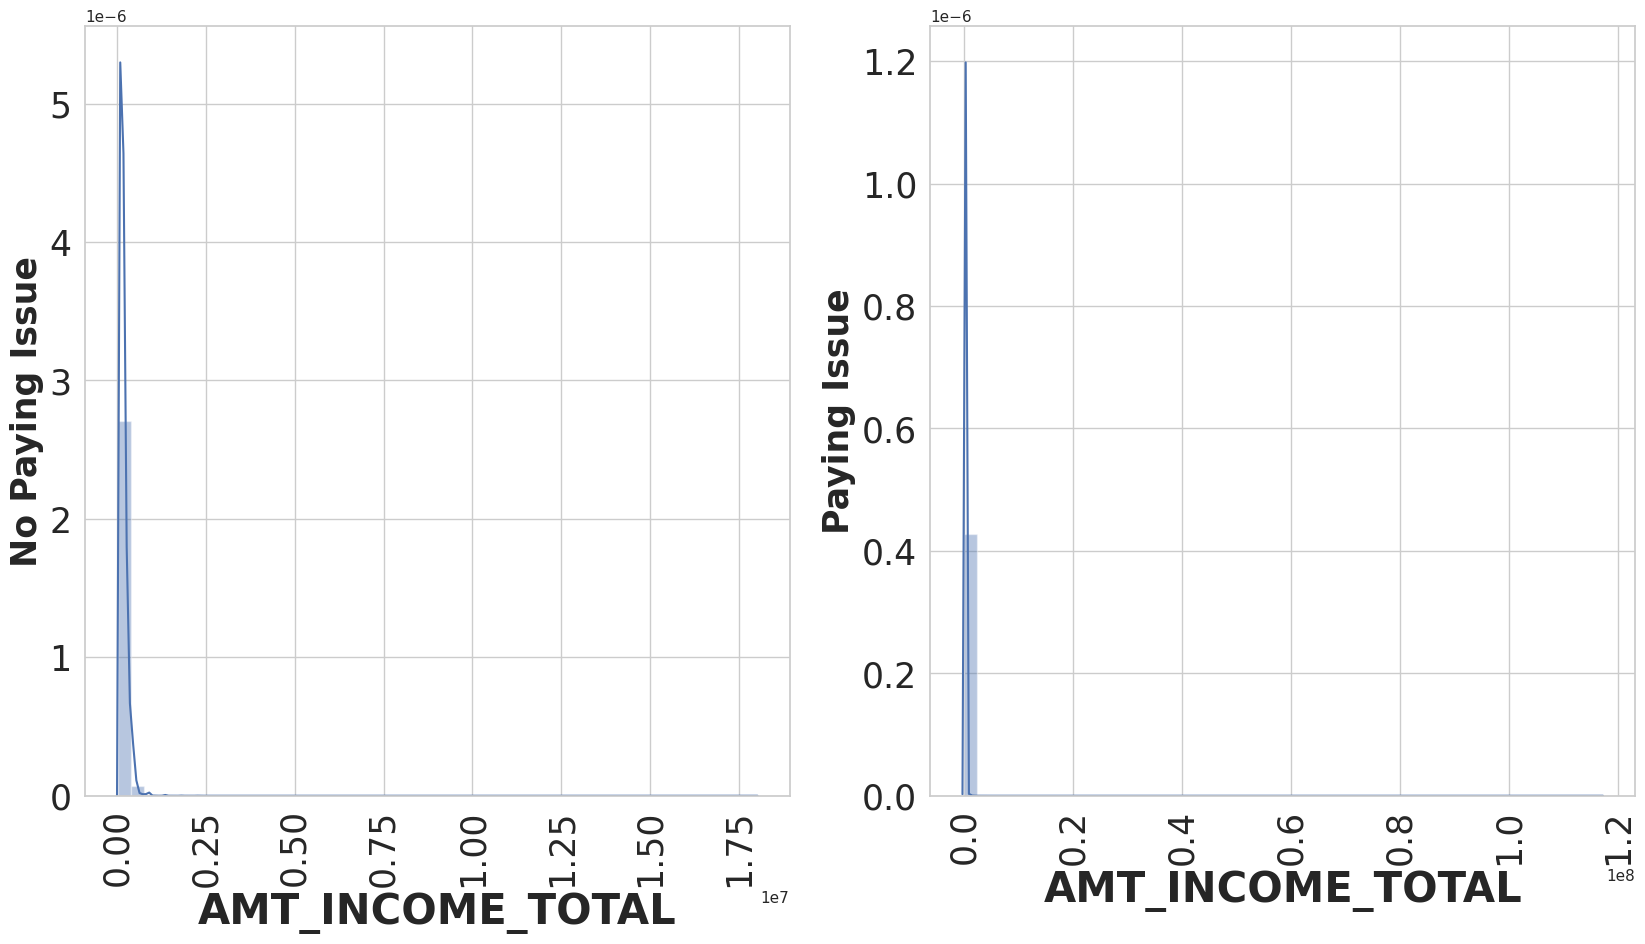

In [261]:
uni_num(col='AMT_INCOME_TOTAL')

##Bivariate analysis

Numeric-Numeric Analysis

In [262]:
data_application.select_dtypes(include='number').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [263]:
correlation_col = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','AGE','DAYS_EMPLOYED','DAYS_BIRTH','CNT_FAM_MEMBERS']

In [264]:
df_repayer = data_application.loc[data_application['TARGET']==0, correlation_col]

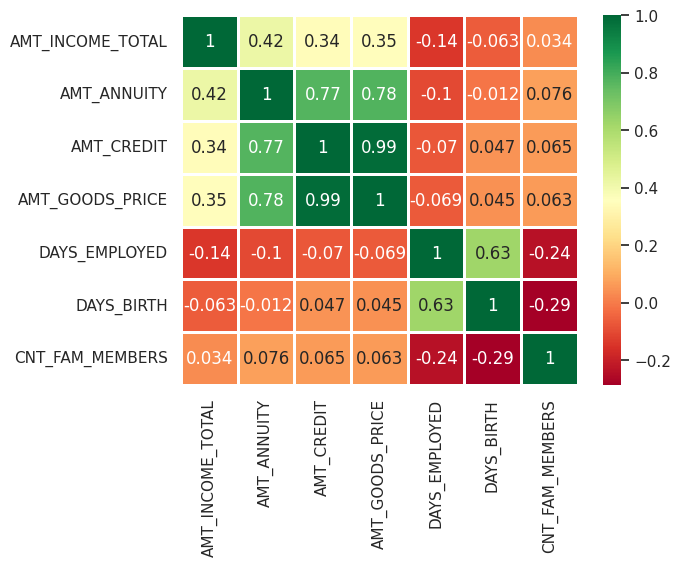

In [265]:
sns.heatmap(df_repayer.corr(),cmap="RdYlGn",annot=True,linewidth =1)
plt.show()

In [266]:
df_defaulter = data_application.loc[data_application['TARGET']==1, correlation_col]

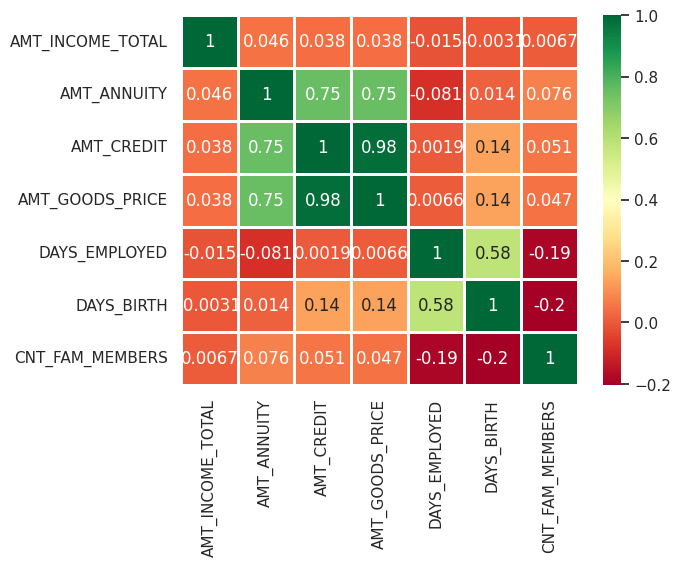

In [267]:
sns.heatmap(df_defaulter.corr(),cmap="RdYlGn",annot=True,linewidth =1)
plt.show()

In [268]:

def bivariate_cat(x, y, data, hue, figsize):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y, data=data, hue=hue, palette=['g', 'r'])
    plt.legend(['Repayer', 'Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()


In [269]:
data_application.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

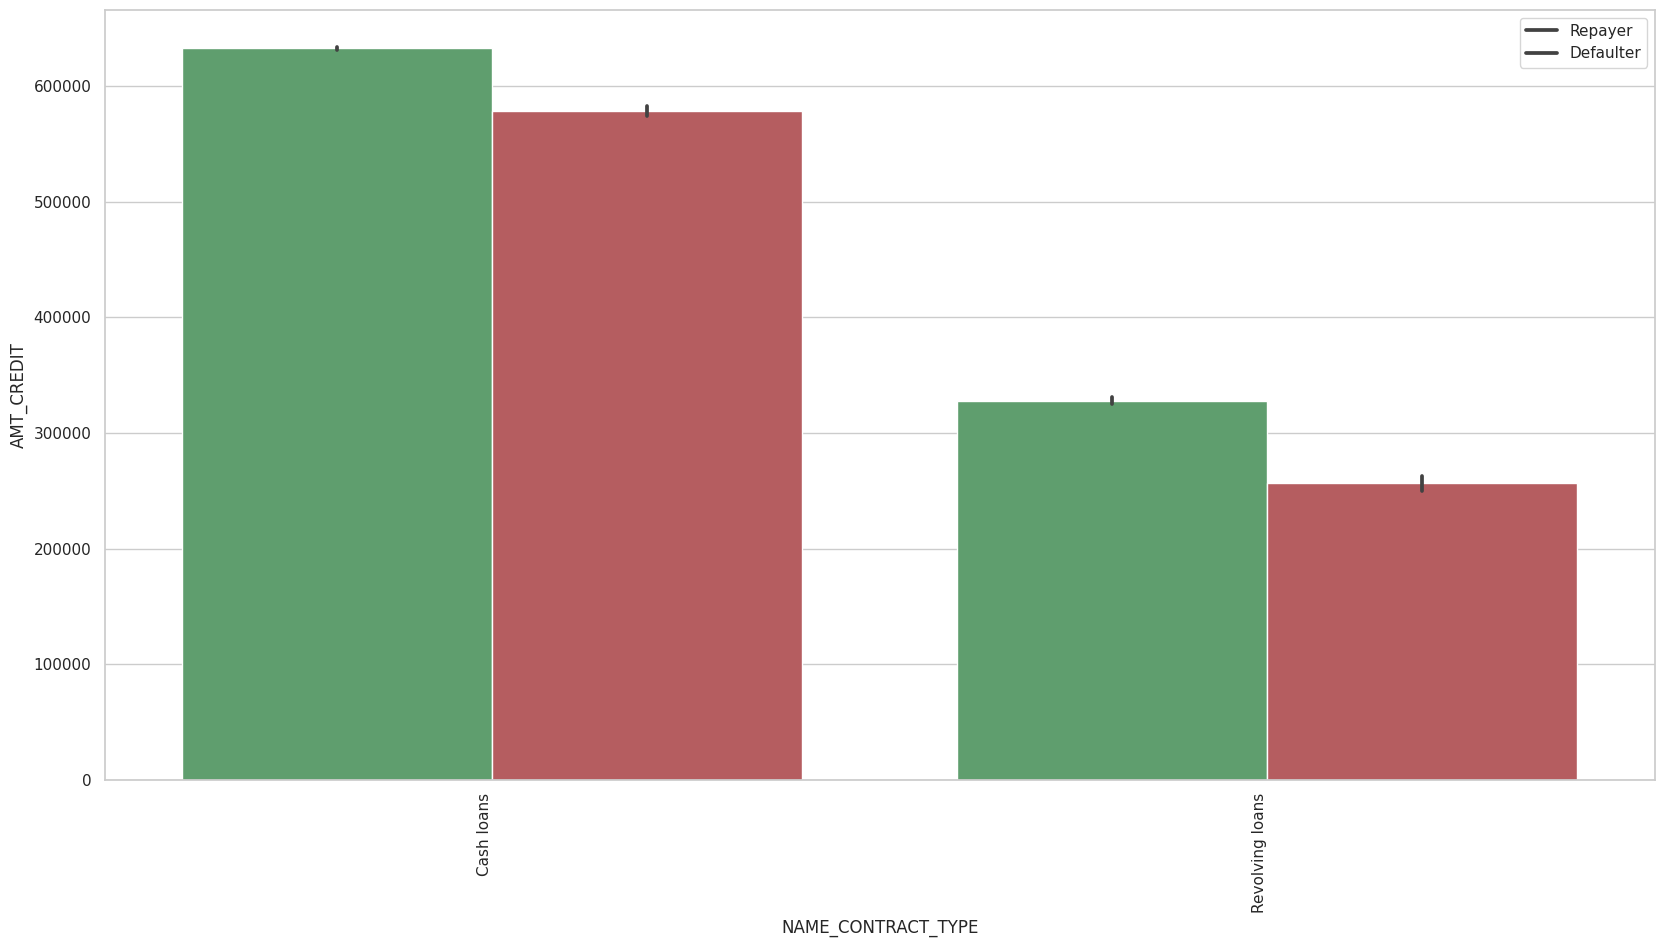

In [270]:
bivariate_cat('NAME_CONTRACT_TYPE','AMT_CREDIT' , data_application, 'TARGET', (20, 10))


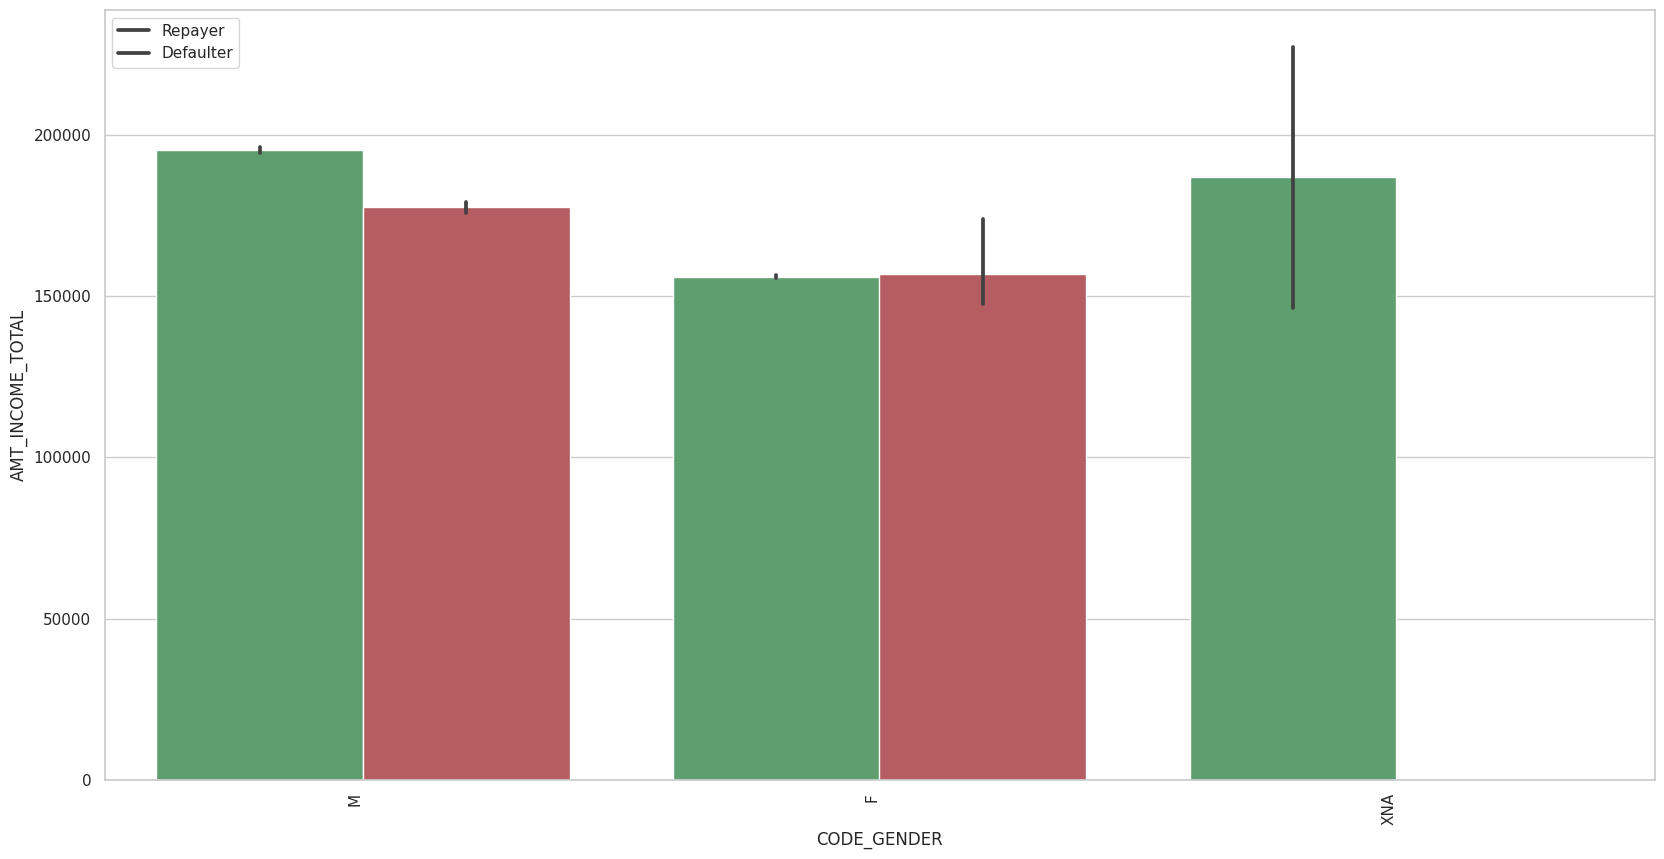

In [271]:
bivariate_cat('CODE_GENDER','AMT_INCOME_TOTAL' , data_application, 'TARGET', (20, 10))


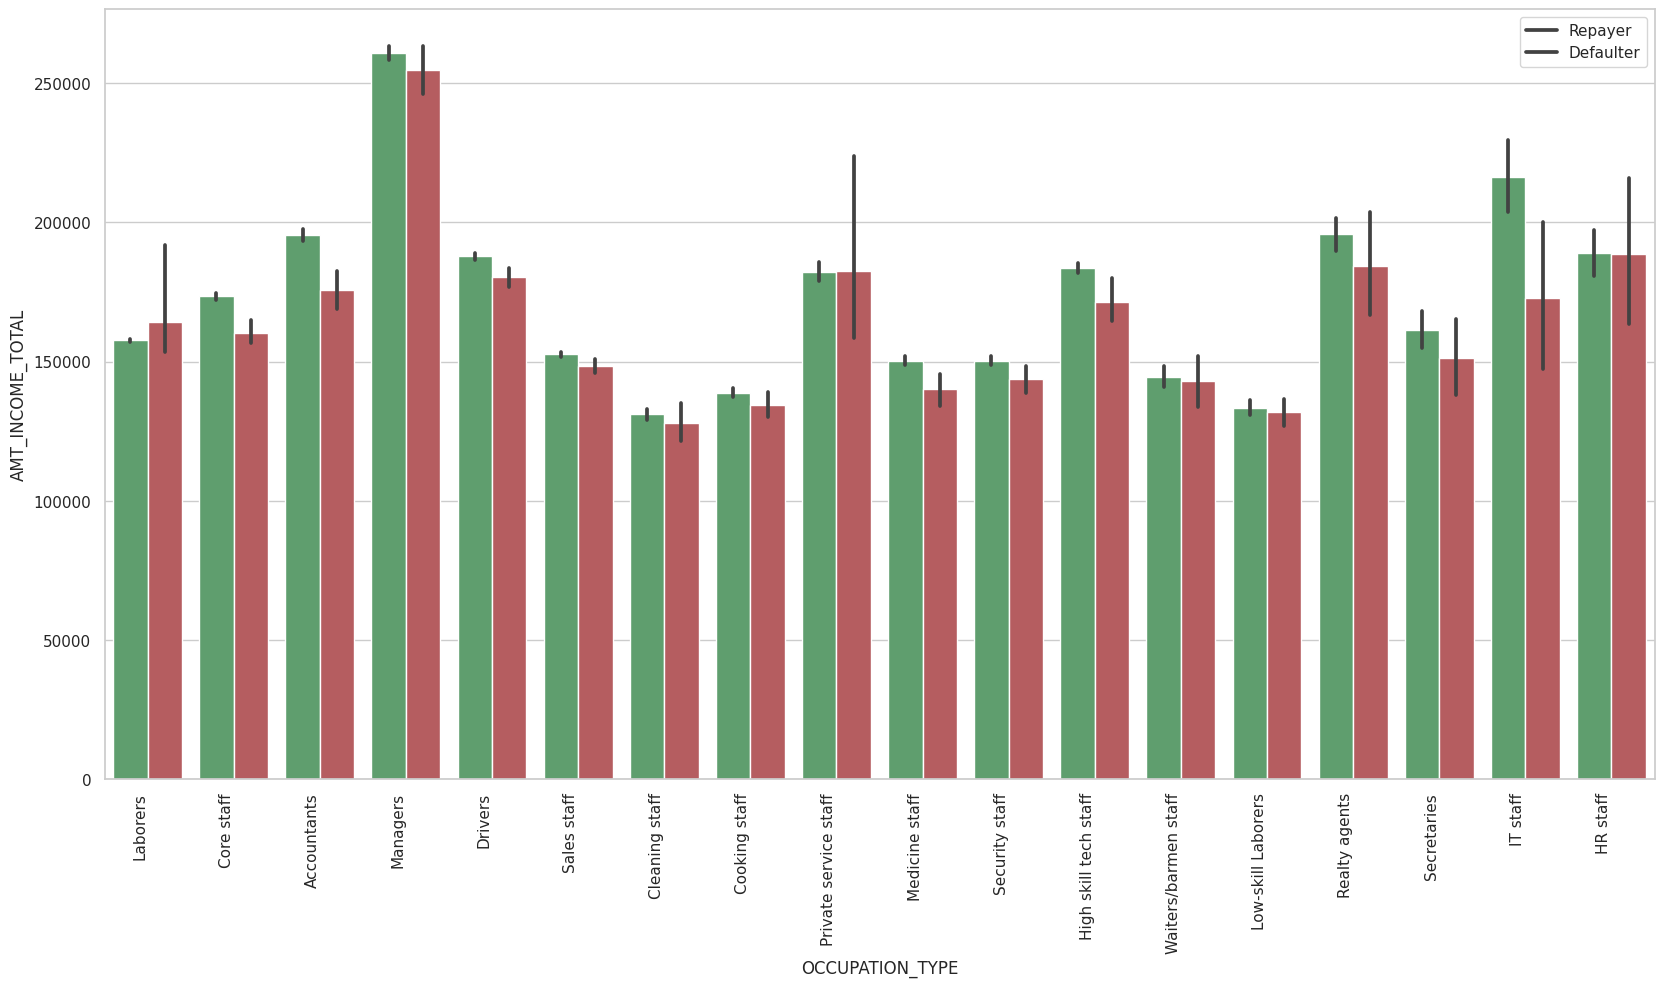

In [272]:
bivariate_cat('OCCUPATION_TYPE','AMT_INCOME_TOTAL', data_application, 'TARGET', (20, 10))


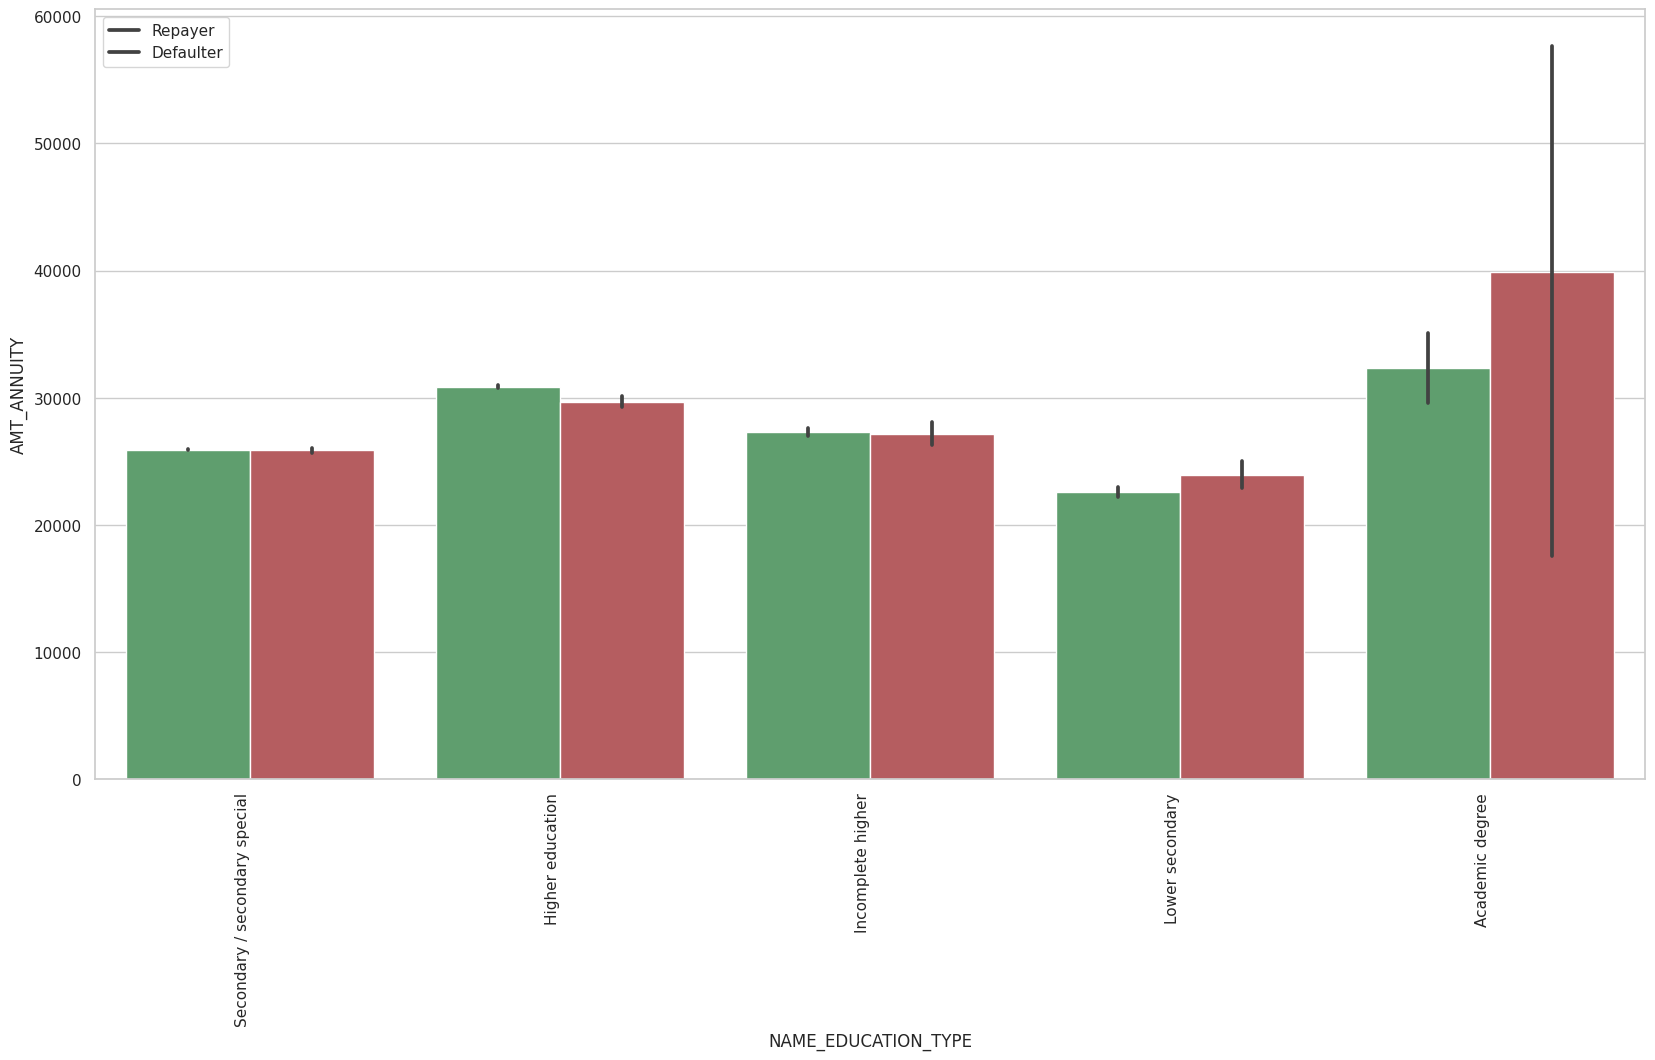

In [273]:
bivariate_cat('NAME_EDUCATION_TYPE','AMT_ANNUITY', data_application, 'TARGET', (20, 10))


##Merging the two dataset

In [274]:
merge_data =  pd.merge(data_application,data_previous1,on='SK_ID_CURR')
merge_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,DAYS_EMPLOYED_RANGE,AGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,100K-150K,400K-600K,0-25K,500K-600K,5Y-10Y,60,2001242,Cash loans,16509.600,180000.0,180000.0,180000.000,XNA,Approved,-865.0,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Regional / Local,1200.0,Consumer electronics,18.0,high,Cash Street: high
1,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,1562.0,0,0.0,0.0,0.0,1.0,1.0,2.0,150K-200K,1M-2M,25K-50K,Above 900K,5Y-10Y,40,1413109,Consumer loans,8996.760,98239.5,98239.5,98239.500,XAP,Approved,-449.0,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164.0,Consumer electronics,12.0,low_action,POS household without interest
2,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,Laborers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1634.0,1,0.0,0.0,0.0,1.0,0.0,5.0,250K-300K,600K-800K,0-25K,400K-500K,5Y-10Y,50,1339797,Cash loans,10618.335,0.0,0.0,10618.335,XNA,Refused,-138.0,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,0.0,XNA,0.0,XNA,Cash
3,100043,0,Cash loans,F,N,Y,2,198000.0,641173.5,23157.0,553500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018850,17199,768,63.0,735,Private service staff,4.0,2,2,THURSDAY,13,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,2411.0,1,0.0,0.0,0.0,0.0,1.0,1.0,150K-200K,600K-800K,0-25K,500K-600K,0-5Y,50,1185699,Consumer loans,5287.815,35775.0,33340.5,35775.000,XAP,Approved,-2411.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,44.0,Connectivity,8.0,low_normal,POS mobile with interest
4,100077,0,Cash loans,M,N,Y,0,180000.0,1256400.0,40657.5,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,12049,579,6105.0,1,Core staff,1.0,1,1,WEDNESDAY,12,0,0,0,0,0,0,Police,4.0,0.0,4.0,0.0,295.0,1,0.0,0.0,0.0,0.0,0.0,8.0,150K-200K,1M-2M,25K-50K,800K-900K,0-5Y,40,2670402,Cash loans,10618.335,0.0,0.0,10618.335,XNA,Refused,-217.0,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,0.0,XNA,

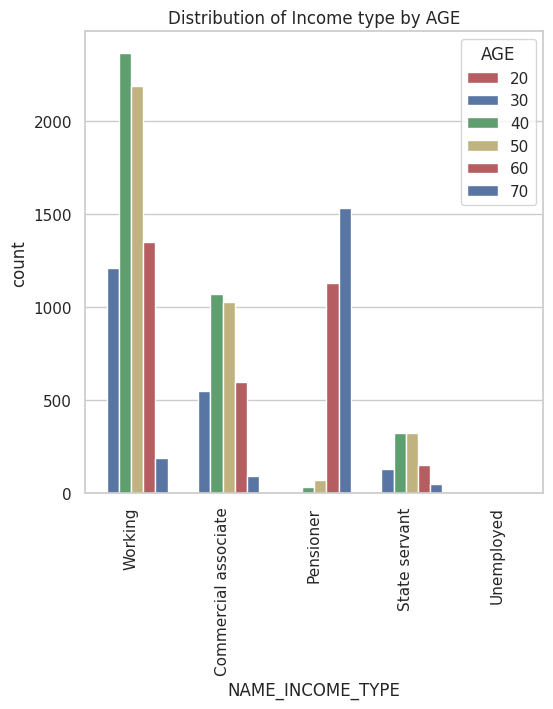

In [275]:
fig = plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x="NAME_INCOME_TYPE", hue="AGE", data=merge_data, palette=["r", "b", "g",'y'])
plt.title("Distribution of Income type by AGE")
plt.xticks(rotation = 90)
plt.show()


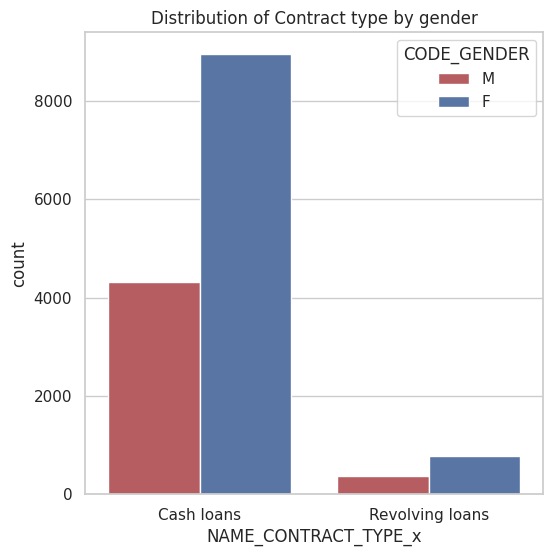

In [276]:
fig = plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x="NAME_CONTRACT_TYPE_x", hue="CODE_GENDER", data=merge_data, palette=["r", "b", "g"])
plt.title("Distribution of Contract type by gender")
plt.show()


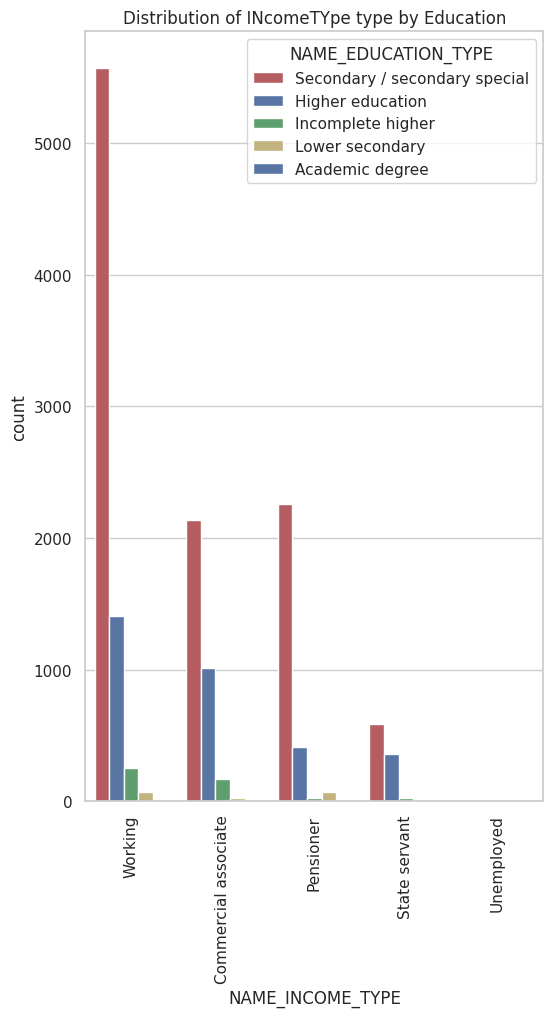

In [277]:
fig = plt.figure(figsize=(13, 10))
plt.subplot(121)
sns.countplot(x="NAME_INCOME_TYPE", hue="NAME_EDUCATION_TYPE", data=merge_data, palette=["r", "b", "g",'y','b'])
plt.title("Distribution of INcomeTYpe type by Education")
plt.xticks(rotation = 90)
plt.show()
